<h1 style="color:green; font-size:30px; font-weight:700; text-align:center">
    <u><b>Adult Income Predictions using Classification</b></u>  
</h1> 

<p></p> 
<strong> Author:</strong> Gurtej Bains <br> 
<strong> Data Source:</strong> http://www.cs.toronto.edu/~delve/data/adult/desc.html <br> 
<strong> Last Updated: </strong> <br>
<strong> Problem Statement:</strong> <br>

US Census Bureau data collected in 1996. It captures the numerous factors that contribute to an individual's annual income. Some of the factors influencing income in this dataset are education level, age, gender, profession, etc. Let's use this dataset to understand the factors influencing salary. 
Additional details about the dataset can be found here (http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html)

<h1 style="color:green"><b>Importing Modules</b> </h1>

## Import libraries

In [179]:
# import libraries  

# Numpy
import numpy as np

# Pandas
import pandas as pd
# For sorting categorical variables 
from pandas.api.types import CategoricalDtype

# MatPlotLib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Seaborn
import seaborn as sns

# MissingNo
import missingno as msno

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.impute import SimpleImputer

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report, recall_score)

# Display estimators as a diagram in a Jupyter lab or notebook context
from sklearn import set_config
set_config(display='diagram') # {'text', 'diagram'}, default=None

# to see the plots in the notebook
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

# functional/enhancement 
import re 
import time 
start_time = time.time()
import sys
import warnings

print ("Import successful")

Import successful


## Color class

In [180]:
# Color class to make print look pretty  
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)

Hello, World!


## Color Pallets

In [181]:
# Set Seaborn color parameters - I
# n_colors=6, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False 

col_pal = sns.cubehelix_palette(n_colors=10, start=1, rot=1.45, light=0.55, dark=0.395, reverse=False, as_cmap=False)
sns.color_palette(col_pal) # this will print the pallette below 

[(0.6671663710599731, 0.4639092574784279, 0.6833040561641264),
 (0.631982828158222, 0.4544739503385634, 0.6872641591164459),
 (0.5847187118659033, 0.44522375574726425, 0.6875277023784281),
 (0.5449771585957968, 0.4396028154062868, 0.6834597755215337),
 (0.5041992312198422, 0.4352819233421411, 0.6752453032023437),
 (0.45277662427946985, 0.4312480276951591, 0.6588717171354203),
 (0.41209406569302576, 0.4287100398081991, 0.64083424240652),
 (0.3628802845356828, 0.4258241550971552, 0.6122790235874231),
 (0.32556429039963297, 0.4233118347761605, 0.5849223165394533),
 (0.2906687062148282, 0.42024281322903345, 0.553950436871317)]

<h1 style="color:green"><b>User Defined Variables </b> </h1>

## Preview the data 

In [182]:
# User defined function to preview the data 
def preview_udf (data_frame, sample_size=10):
  """
  This function takes a table and returns a detailed description of its shape.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  # Logic is built here 
  no_of_columns = data_frame.shape[1]
  no_of_rows = data_frame.shape[0]
  sample_data = data_frame.sample(sample_size)
  
  # Print statements are here 
  print (f"{color.BOLD}Total number of columns in dataframe: {color.RED}{no_of_columns:,.0f}{color.END}{color.END}")
  print (f"{color.BOLD}Total number of rows in dataframe: {color.RED}{no_of_rows:,.0f}{color.END}{color.END}")
  print (f"{color.BOLD}The info output is below: {color.END}")
  print (" ")
  data_frame.info() 
  print (" ")
  print (f"{color.BOLD}Below is the sample of {color.RED}{sample_size:,.0f} records {color.END}{color.END}")
  print (" ")
  return sample_data

## Check duplicate rows

In [183]:
# User defined function to check duplicate rows  
def duplicates_udf (data_frame):
  """
  This function takes a table and returns a duplicate rows info.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  # row level calculations here
  no_of_rows = data_frame.shape[0]
  actual_row_dups = data_frame.duplicated(keep=False).sum() # False: Mark all duplicates as True
  actual_row_dups_per = actual_row_dups/no_of_rows
  
  # column level calculations here 
  no_of_columns = data_frame.shape[1]
  actual_col_dups = data_frame.T.duplicated( ).sum()
  actual_col_dups_per = actual_col_dups/no_of_columns
 
  # print column level data here 
  print (f"{color.BOLD}Column Level: {color.END}")
  print (f"Total number of columns: {color.RED}{no_of_columns:,.0f}{color.END}")
  print (f"Total duplicate columns identified: {color.RED}{actual_col_dups}{color.END} which is {color.RED}{actual_col_dups_per:.2f}% {color.END} of total rows.")
  print (" ")
    
  # print row level data here 
  print (f"{color.BOLD}Row Level: {color.END}")
  print (f"Total number of rows in dataframe: {color.RED}{no_of_rows:,.0f}{color.END}")
  print (f"Total duplicate row values: {color.RED}{actual_row_dups}{color.END} which is {color.RED}{actual_row_dups_per:.2f}% {color.END}of total rows.")

## Profiling Columns

In [184]:
# User defined functiont to profile columns 

def column_profile_udf (data_frame, column_name, print_counts):
    """
    This function takes a pandas data frame only and returns high level column profile and data type specific profile  
    data_frame: enter the dataframe name 
    column_name: enter the column name 
    sample_size: enter the sample size of the output to be viewed 
    """    
    # building logic for high level column profile (both numeric and categorical) 
    data_type = data_frame[column_name].dtype
    no_of_rows = data_frame.shape[0]
    missing_count = int(data_frame[column_name].isna().sum())
    missing_count_pct = data_frame[column_name].isna().sum()/data_frame[column_name].shape[0]
       
    # print for high level column profile (both numerical and categorical)
    print ("")
    print (f"{color.RED}{color.BOLD}{column_name}: High Level Profile{color.END}{color.END}") 
    print (f"{color.BOLD}{color.END}Data type: {color.BOLD}{data_type}{color.END}.")
    print (f"Total rows: {color.BOLD}{no_of_rows:,.0f}{color.END}.")
    print (f"Missing values: {color.BOLD}{missing_count:,.0f} ({color.BOLD}{missing_count_pct:.1%}{color.END}).")
    print (" ")
    
    # Logic for numeric columns only 
    if (data_frame[column_name].dtype == 'int64') | (data_frame[column_name].dtype == 'float64'):
    
        # Outliers
        q1 = data_frame[column_name].quantile(0.25) # 25th percentile
        q3 = data_frame[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = data_frame[(data_frame[column_name] < low_limit)]
        high_df = data_frame[(data_frame[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = ((low_oulier_count)/(data_frame.shape[0])*100)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = ((high_oulier_count)/(data_frame.shape[0])*100)
        total_outliers = low_oulier_count+high_oulier_count
                
        # Logic for sorting values
        counts = data_frame[column_name].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
        percent = data_frame[column_name].value_counts(dropna=False, normalize=True)
        column_profile_stg1 = pd.DataFrame ({'Unique Counts': counts, 'Percentage': percent})
        column_profile_stg1.sort_values(by='Unique Counts', ascending=False, na_position='first', inplace=True)
        column_profile_stg1.loc['Total'] = column_profile_stg1.sum()
        
        # print for numerical only 
        print (f"{color.RED}{color.BOLD}Numerical Column: Additional Metrics{color.END}{color.END}") 
        print (f"Total Outlier Counts: {color.BOLD}{total_outliers:,.0f}{color.END}.")  
        print (f"Low limit is: {color.BOLD}{low_limit:,.0f}{color.END} with {color.BOLD}{low_oulier_count:,.0f} ({low_outlier_percentge:.1%}{color.END}) below this.")
        print (f"High limit is: {color.BOLD}{high_limit:,.0f}{color.END} with {color.BOLD}{high_oulier_count:,.0f} ({high_outlier_percentge:.1%}{color.END}) above this limit") 
        print ("")
        
        # print sorted values 
        print (f"{color.RED}{color.BOLD}Numerical Column: {print_counts} Sorted Values (NaN first) {color.END}{color.END}")
        return column_profile_stg1.head(print_counts).style.format({"Unique Counts"  : '{:,.0f}', 
                                                           "Percentage"    : '{:.1%}' })
    # Logic for categorical columns only 
    elif (data_frame[column_name].dtype == 'category') | (data_frame[column_name].dtype == 'object') | (data_frame[column_name].dtype == 'string'):
        
        # Logic for sorting values
        counts = data_frame[column_name].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
        percent = data_frame[column_name].value_counts(dropna=False, normalize=True)
        column_profile_stg2 = pd.DataFrame ({'Unique Counts': counts, 'Percentage': percent})
        column_profile_stg2.sort_values(by='Unique Counts', ascending=False, na_position='first', inplace=True)
        column_profile_stg2.loc['Total'] = column_profile_stg2.sum()
              
        # print for categorical only 
        # print additional metrics 
        print (f"{color.RED}{color.BOLD}Categorical Column: Additional Metrics{color.END}{color.END}") 
        print(f"There are a total of {color.BOLD}{data_frame[column_name].nunique()}{color.END} unique values.")
        print ("")
        
        # print sorted values 
        print (f"{color.RED}{color.BOLD}Categorical Column: All Sorted Values (NaN first){color.END}{color.END}")
        return column_profile_stg2.style.format({"Unique Counts"  : '{:,.0f}', 
                           "Percentage"     : '{:.1%}' }).highlight_max(color='lightgreen')

## Checking Missing Values

In [185]:
# User defined function to check missing values
def missing_values_udf (data_frame):
    # Logic is built here 
    cols = int(data_frame.shape[1])
    stats_df = pd.DataFrame()
    for i in data_frame.columns:
        stats_df.loc[i, "Total Rows"] = int(data_frame[i].shape[0])
        stats_df.loc[i, "Total Unique Counts"] = int(data_frame[i].nunique(dropna=False))
        #stats_df.loc[i, "Has Missing Values"] = (data_frame[i].isna().sum() > 0)
        stats_df.loc[i, "Missing Value Counts"] = int(data_frame[i].isna().sum())  
        stats_df.loc[i, "Missing Value Percentage"] = data_frame[i].isna().sum()/data_frame[i].shape[0]
      
    return stats_df.head(cols).sort_values(by='Missing Value Counts', ascending=False).style.format({'Total Rows': '{:,.0f}',
             'Total Unique Counts': '{:,.0f}',
             'Missing Value Counts': '{:,.0f}',
             'Missing Value Percentage': '{0:.2%}'}).background_gradient(subset=['Missing Value Counts'], cmap='PuBu').background_gradient(subset=['Missing Value Percentage'], cmap='BuGn')

## EDA of numeric data

In [186]:
# User defined function to perform univaraite analysis on numerical data types only 
def univariate_numerical_eda_udf (dataframe, column_name):
    """EDA function to plot a histogram and boxplot for the selected column
         dataframe: specify the data frame
         column_name: specify the column name 
    """
    # setting theme
    sns.set_theme(style="white", palette='flare', rc={"figure.dpi": 100})

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize = (9, 6), gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.histplot (data=dataframe, x=column_name, ax=ax_hist, edgecolor='k')
    sns.boxplot  (data=dataframe, x=column_name, ax=ax_box, showmeans=True )
    
    # Annotating mean 
    mean_price = dataframe[column_name].mean()
    ax_hist.axvline(mean_price, color = 'k', ls = ':', label = f'Mean Price = ${round(mean_price,2)}')
    
    # Annotating median
    med_price = dataframe[column_name].median()
    ax_hist.axvline(med_price, color = 'r', ls = ':', label = f'Median Price = ${round(med_price,2)}')
    
    # Remove x & y axis name for the boxplot
    ax_box.set(xlabel='')
    ax_hist.set(ylabel='Unique Counts')
    
    # Adding titles and subtitles 
    fig.suptitle(f'Univariate EDA: {column_name}', fontsize=20, weight='bold', ha='center')
    plt.title(" ")    
    plt.show( )
    
    # Don't miss return as the graphs will not print
    return fig, ax_box, ax_hist

## EDA of categorical data

In [187]:
# User defined function to perform univaraite analysis on categorical data types only
def univariate_categorical_eda_udf (dataframe, column_name):
    """EDA function to plot a histogram and boxplot for the selected column
         dataframe: specify the data frame
         column_name: specify the column name 
    """
    # setting theme
    sns.set_theme(style="white", palette='flare', rc={"figure.dpi": 100})

    # creating a figure with matplotlib.Axes objects (ax_hist)
    fig, (ax_hist) = plt.subplots(sharex=True, figsize = (9, 6))

    # assigning a graph to each ax
    sns.countplot (data=dataframe, y=column_name, ax=ax_hist, lw=1.25, ec='k', color=col_pal[1], order = dataframe[column_name].value_counts().index)
    
    # remove y-label
    ax_hist.set(ylabel='')
    
    # x-label
    ax_hist.set(xlabel='Unique Counts')
    
    #print
    fig.suptitle(f'Univariate EDA: {column_name}', fontsize=15, weight='bold', ha='center')
    plt.show()

## Model metrics

In [188]:
## define the evaluate_classification function here

def evaluate_classiffication(lgr_pipe, X_test, y_test, label=""):
  test_preds = lgr_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

<h1 style="color:green"><b>Import Data </b> </h1>

## Importing data

In [189]:
# Import the data file

df = pd.read_csv(r"C:\Users\gurte\OneDrive\All About Learning\Coding Dojo\Learning Material\05 Projects\Project 2\Salary Data\adult.csv")
print ("Import successful")

Import successful


<h1 style="color:green"><b>Clean Data - I </b> </h1>

## Trim white spaces

In [190]:
# stripping all leading and lagging white space from categorical coloumns 
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

## String standardization 

In [191]:
# making all string columns lower case to standardize the data 
df[df_obj.columns] = df_obj.apply(lambda x: x.str.lower())

## Column name standardization

In [192]:
# making all column names lower case
df.columns= df.columns.str.lower()
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

<h1 style="color:green"><b>Inspecting Data - I </b> </h1>

## Preview the data

In [193]:
# The below udf will print numer of columns, rows and user specified sample number of rows. 10 is default.

# USAGE NOTES:
# 1. overall_shape(data_frame, sample_size=10) 
# 2. Apply style formatter below and change the column names according to the data frame 

preview_udf (df)

Total number of columns in dataframe: 15
Total number of rows in dataframe: 48,842
The info output is below: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32871,34,private,182401,assoc-acdm,12,divorced,adm-clerical,not-in-family,black,male,0,0,40,united-states,<=50k
17945,44,private,443040,hs-grad,9,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
3757,61,?,38603,7th-8th,4,divorced,?,not-in-family,white,male,0,0,20,united-states,<=50k
48203,55,private,51008,hs-grad,9,divorced,adm-clerical,unmarried,white,female,0,0,40,united-states,<=50k
12298,37,private,506830,bachelors,13,never-married,adm-clerical,not-in-family,black,female,0,0,40,united-states,<=50k
40539,36,private,189670,hs-grad,9,married-civ-spouse,machine-op-inspct,wife,white,female,0,0,50,united-states,<=50k
21459,41,local-gov,175149,hs-grad,9,divorced,transport-moving,not-in-family,black,female,0,0,38,united-states,<=50k
41759,43,self-emp-not-inc,147269,10th,6,married-civ-spouse,craft-repair,husband,white,male,0,0,60,?,<=50k
27739,31,private,112062,bachelors,13,never-married,prof-specialty,not-in-family,white,female,0,0,40,united-states,<=50k
27707,47,local-gov,173938,bachelors,13,married-civ-spouse,craft-repair,husband,white,male,0,0,50,united-states,>50k


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. Not sure what fnlwgt column is. Need more clarity and unfortunately there are not details on the data source website. 
2. Education num should be a category

## **Change Data Type**

In [194]:
# changing data types 
df['educational-num'] = df['educational-num'].astype('object')

In [195]:
# QA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  object
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.6+ MB


## Descriptive stats for numeric variables

In [196]:
# Summary stats of numeric vars. Count only in this code as this needs separate style formatting. 
df.describe().loc[['count']].style.format('{:,.0f}')

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,"48,842","48,842","48,842","48,842","48,842"


In [197]:
# Summary stats of numeric vars. 

# USAGE NOTES: 
# 1. Counts excluded from this code as it needs separate style formatting 
# 2. Update column names and style fomatting based on the data frame 

df.describe(percentiles=[0.25,0.5,0.75,0.05,0.95]).\
loc[['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']].\
style.format({"age"            : '{:.0f} yrs', 
              "fnlwgt"         : '{:,.0f}',
              "capital-gain"   : '${:,.2f}', 
              "capital-loss"   : '${:,.2f}',
              "hours-per-week" : '{:.2f}'}) 

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
mean,39 yrs,"189,664","$1,079.07",$87.50,40.42
std,14 yrs,"105,604","$7,452.02",$403.00,12.39
min,17 yrs,"12,285",$0.00,$0.00,1.00
5%,19 yrs,"39,615",$0.00,$0.00,17.05
25%,28 yrs,"117,550",$0.00,$0.00,40.00
50%,37 yrs,"178,144",$0.00,$0.00,40.00
75%,48 yrs,"237,642",$0.00,$0.00,45.00
95%,63 yrs,"379,482","$5,013.00",$0.00,60.00
max,90 yrs,"1,490,400","$99,999.00","$4,356.00",99.00


## **Descriptive statistics for categorical columns**

In [198]:
# Summary stats of character vars
df.describe(include=['object','category'])

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,16,7,15,6,5,2,42,2
top,private,hs-grad,9,married-civ-spouse,prof-specialty,husband,white,male,united-states,<=50k
freq,33906,15784,15784,22379,6172,19716,41762,32650,43832,37155


<h1 style="color:green"><b>Duplicates</b> </h1> 

## **Check duplicates** 

In [199]:
# USAGE NOTES
# 1. duplicates_udf (data_frame) 

duplicates_udf (df)

Column Level: 
Total number of columns: 15
Total duplicate columns identified: 0 which is 0.00%  of total rows.
 
Row Level: 
Total number of rows in dataframe: 48,842
Total duplicate row values: 101 which is 0.00% of total rows.


In [200]:
# list of all duplicate values. Using keep=False so that all the values can be visible 
df[df.duplicated(keep=False)].sort_values(by='fnlwgt')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41905,39,private,30916,hs-grad,9,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
45127,39,private,30916,hs-grad,9,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
38156,49,private,31267,7th-8th,4,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
24201,49,private,31267,7th-8th,4,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
11212,29,private,36440,bachelors,13,never-married,adm-clerical,not-in-family,white,female,0,0,40,united-states,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,44,private,367749,bachelors,13,never-married,prof-specialty,not-in-family,white,female,0,0,45,mexico,<=50k
15960,18,self-emp-inc,378036,12th,8,never-married,farming-fishing,own-child,white,male,0,0,10,united-states,<=50k
3900,18,self-emp-inc,378036,12th,8,never-married,farming-fishing,own-child,white,male,0,0,10,united-states,<=50k
33127,35,private,379959,hs-grad,9,divorced,other-service,not-in-family,white,female,0,0,40,united-states,<=50k


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Upon looking, seems like the same row is getting repeated twice. So will select one row based on 

## **Handle duplicates** (df_2)

In [201]:
# removing row duplicates here 

df_2 = df.drop_duplicates(keep = 'last')
preview_udf(df_2, 5) 

Total number of columns in dataframe: 15
Total number of rows in dataframe: 48,790
The info output is below: 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  object
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25187,46,self-emp-not-inc,182541,hs-grad,9,married-civ-spouse,farming-fishing,husband,white,male,0,1672,50,united-states,<=50k
6622,68,private,90526,12th,8,married-civ-spouse,farming-fishing,husband,white,male,0,0,35,united-states,<=50k
43268,37,state-gov,29145,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,50,united-states,>50k
10101,56,private,359972,masters,14,married-civ-spouse,exec-managerial,husband,white,male,0,0,60,england,>50k
33152,35,private,187693,hs-grad,9,never-married,machine-op-inspct,own-child,white,male,0,0,40,united-states,<=50k


In [202]:
# USAGE NOTES
# 1. duplicates_udf (data_frame) 

duplicates_udf (df_2)

Column Level: 
Total number of columns: 15
Total duplicate columns identified: 0 which is 0.00%  of total rows.
 
Row Level: 
Total number of rows in dataframe: 48,790
Total duplicate row values: 0 which is 0.00% of total rows.


<h1 style="color:green"><b>Clean Data - II</b> </h1> 

## **Delete unnecessary columns** (df_3)

In [203]:
df_3 = df_2.drop(columns=['fnlwgt', 'education', 'relationship'])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   educational-num  48790 non-null  object
 3   marital-status   48790 non-null  object
 4   occupation       48790 non-null  object
 5   race             48790 non-null  object
 6   gender           48790 non-null  object
 7   capital-gain     48790 non-null  int64 
 8   capital-loss     48790 non-null  int64 
 9   hours-per-week   48790 non-null  int64 
 10  native-country   48790 non-null  object
 11  income           48790 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

I feel the above columns will not add value to the model and can be dropped

<h1 style="color:green"><b>Profiling Columns</b> </h1> 

## **age**

In [204]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'age', print_counts=10)


age: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 215.
Low limit is: -2 with 0 (0.0%) below this.
High limit is: 78 with 215 (44.1%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


,Unique Counts,Percentage
36,"1,348",2.8%
35,"1,336",2.7%
33,"1,335",2.7%
23,"1,325",2.7%
31,"1,324",2.7%
34,"1,303",2.7%
28,"1,279",2.6%
37,"1,279",2.6%
30,"1,275",2.6%
38,"1,263",2.6%


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. No duplicates
2. Outliers detected 

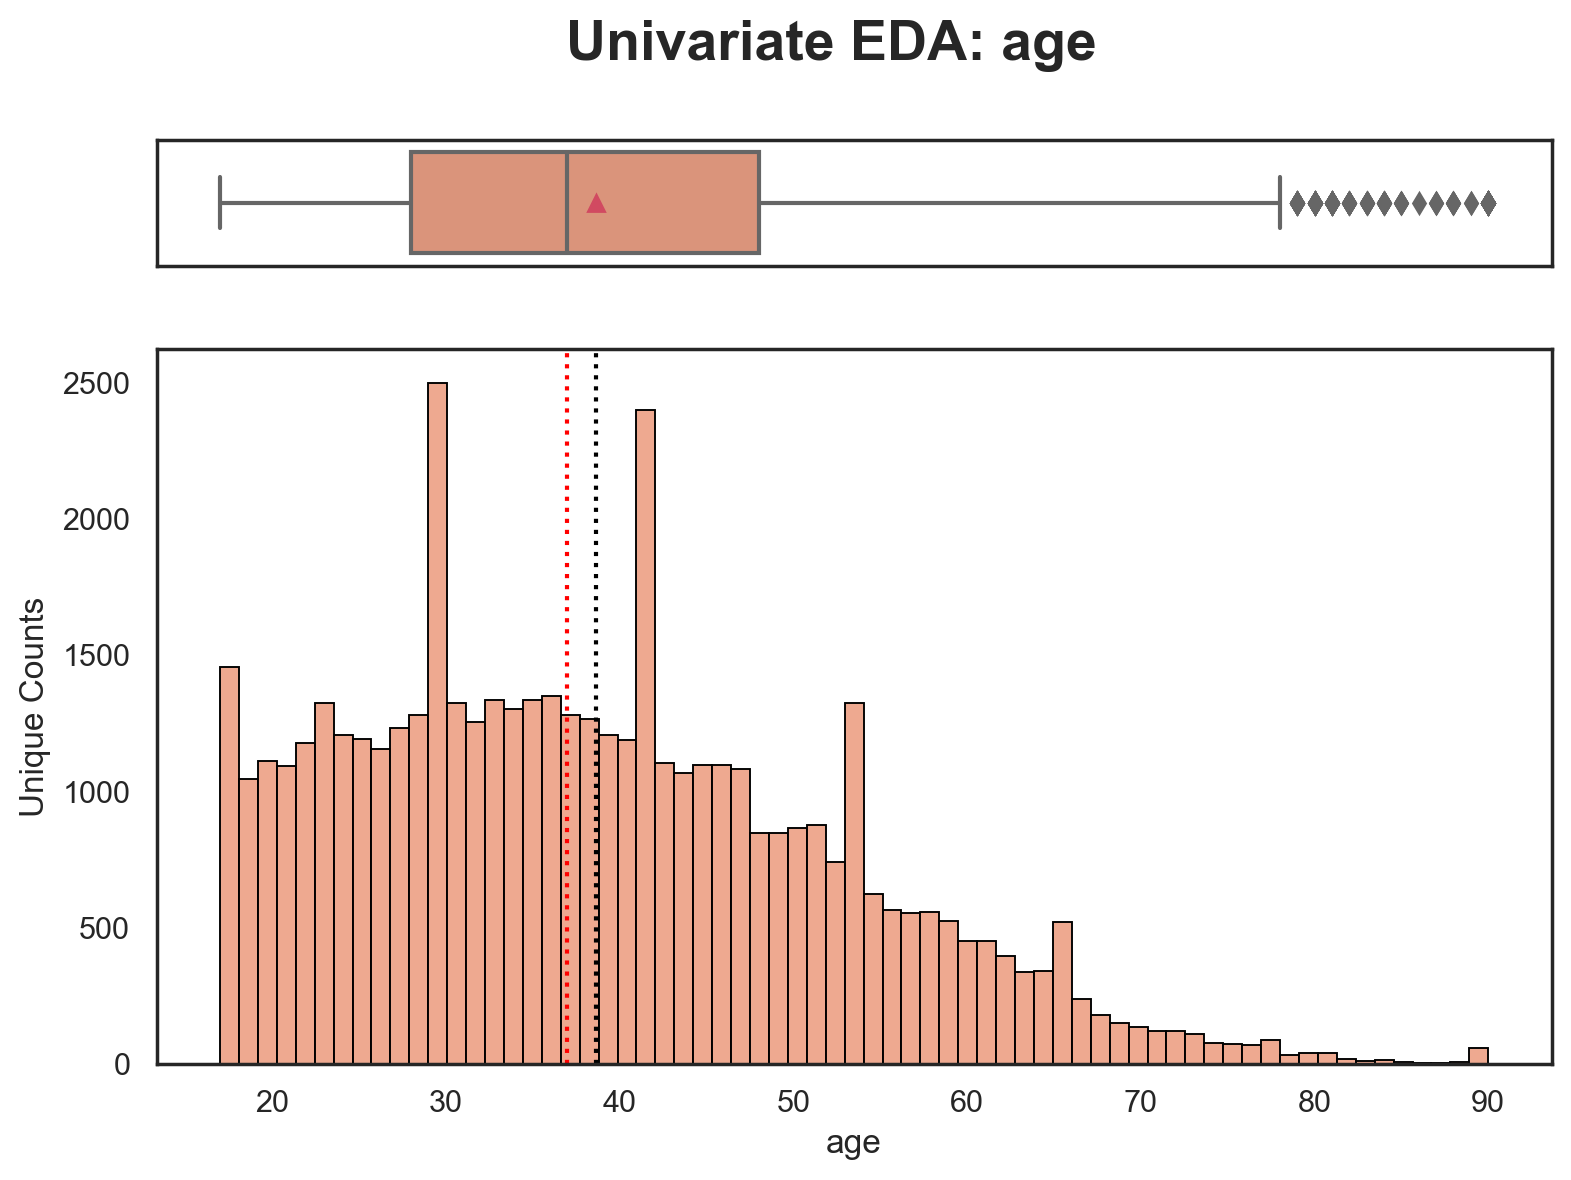

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='age', ylabel='Unique Counts'>)

In [205]:
univariate_numerical_eda_udf (df_3, 'age')

## **workclass**

In [206]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'workclass', print_counts=10)


workclass: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 9 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
private,"33,860",69.4%
self-emp-not-inc,"3,861",7.9%
local-gov,"3,136",6.4%
?,"2,795",5.7%
state-gov,"1,981",4.1%
self-emp-inc,"1,694",3.5%
federal-gov,"1,432",2.9%
without-pay,21,0.0%
never-worked,10,0.0%
Total,"48,790",100.0%


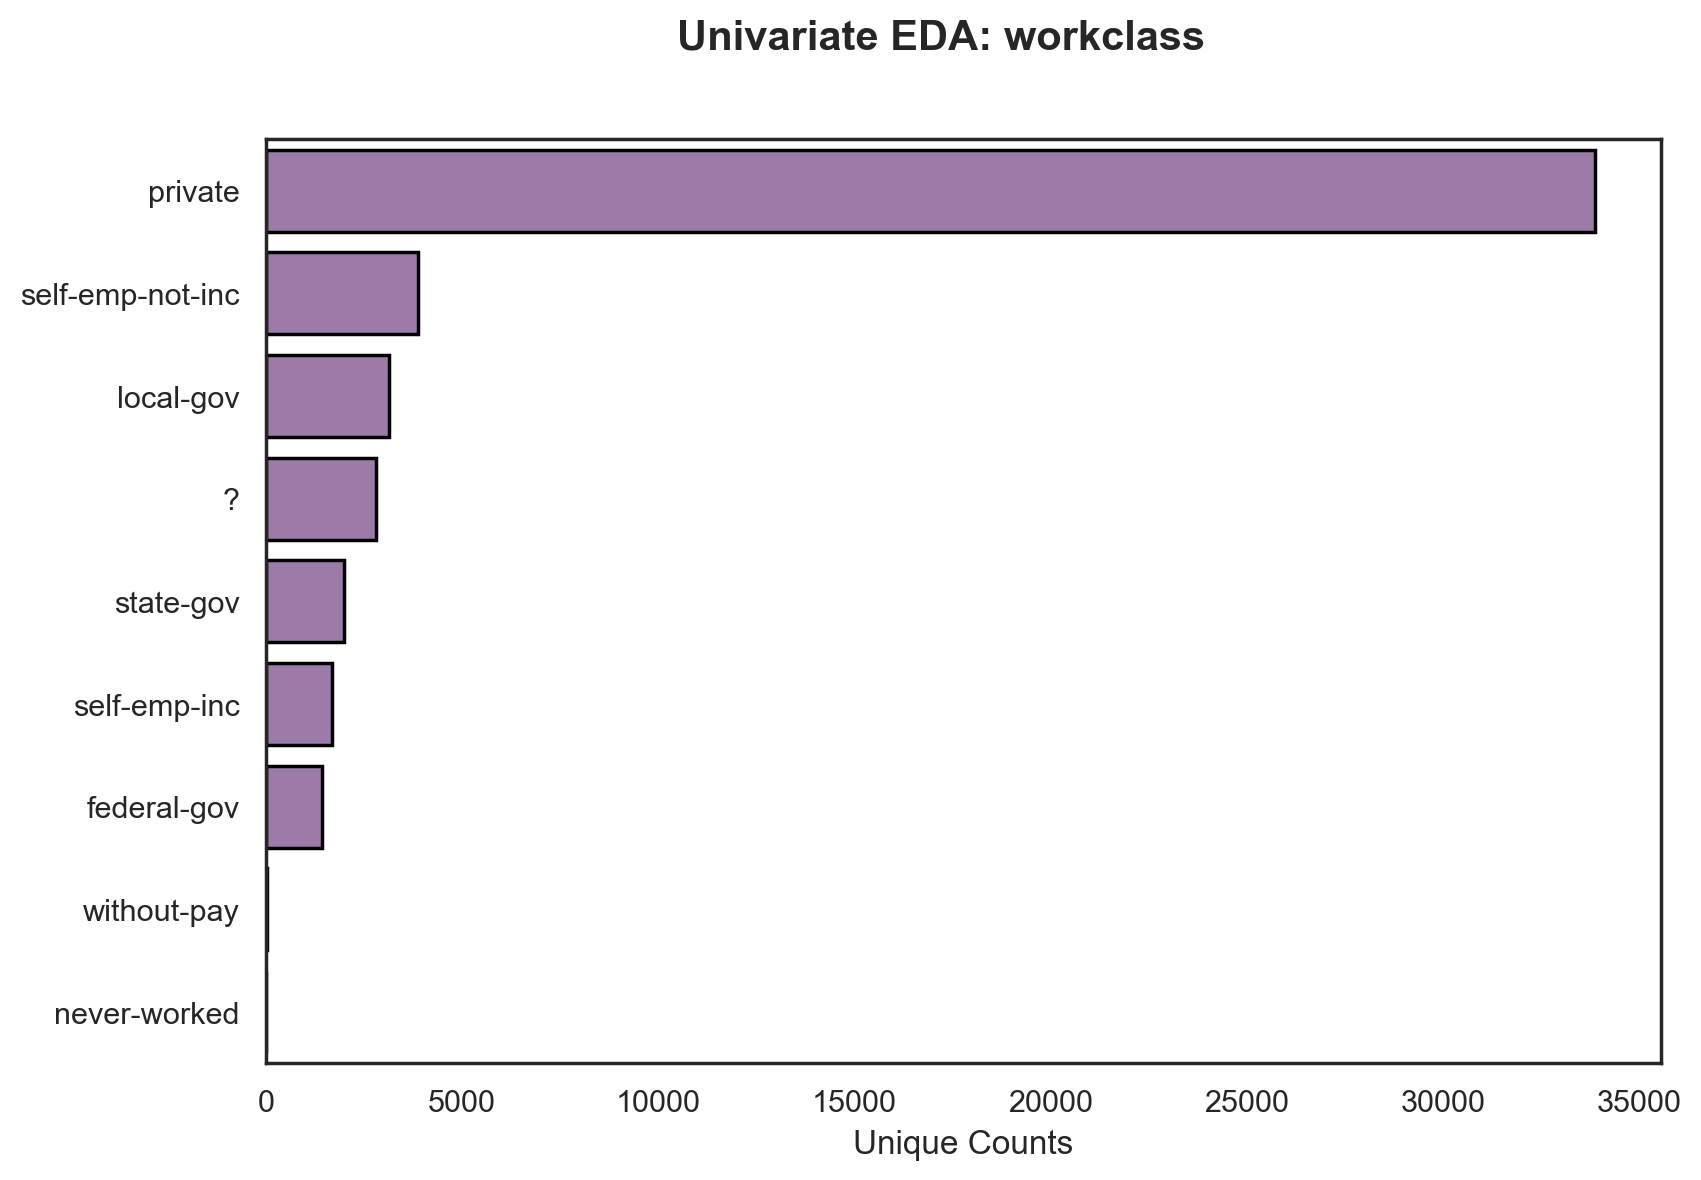

In [207]:
univariate_categorical_eda_udf (df_3, 'workclass')

In [208]:
df_3.groupby(['occupation', 'workclass'], dropna=False).aggregate({'workclass':'count'}, 
                margins=True,
                margins_name = 'Total Counts').\
sort_values(by='occupation', ascending=True).head(10).style.format('{:,.0f}').\
background_gradient(cmap='Blues').\
set_caption("Cross Tab Showing <strong>counts by occupation and workclass </strong>").\
set_table_styles([{'selector': 'caption',
                   'props':[('text-align', 'center'),
                            ('font-size', '150%'),
                            ('color', 'green')]}, 
                 {'selector' : 'th', 'props': [('border', '1px solid green')]}, # th is for the top and left column names/headers 
                 {'selector' : 'td', 'props': 'border-left: 1px solid black'},   # td is for the body where aggregation happens 
                 {'selector' : '', 'props': [('border', '1px solid black')]}])   # this is for the table border 

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. There is a bad value of "?". These should be encoded as "never worked" 

In [209]:
# replacing bad values
df_3['workclass'] = df_3['workclass'].replace({'?':'never-worked'})

In [210]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'workclass', print_counts=10)


workclass: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 8 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
private,"33,860",69.4%
self-emp-not-inc,"3,861",7.9%
local-gov,"3,136",6.4%
never-worked,"2,805",5.7%
state-gov,"1,981",4.1%
self-emp-inc,"1,694",3.5%
federal-gov,"1,432",2.9%
without-pay,21,0.0%
Total,"48,790",100.0%


## **educational-num**

In [211]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'educational-num', print_counts=10)


educational-num: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 16 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
9,"15,770",32.3%
10,"10,863",22.3%
13,"8,013",16.4%
14,"2,656",5.4%
11,"2,060",4.2%
7,"1,812",3.7%
12,"1,601",3.3%
6,"1,389",2.8%
4,954,2.0%
15,834,1.7%


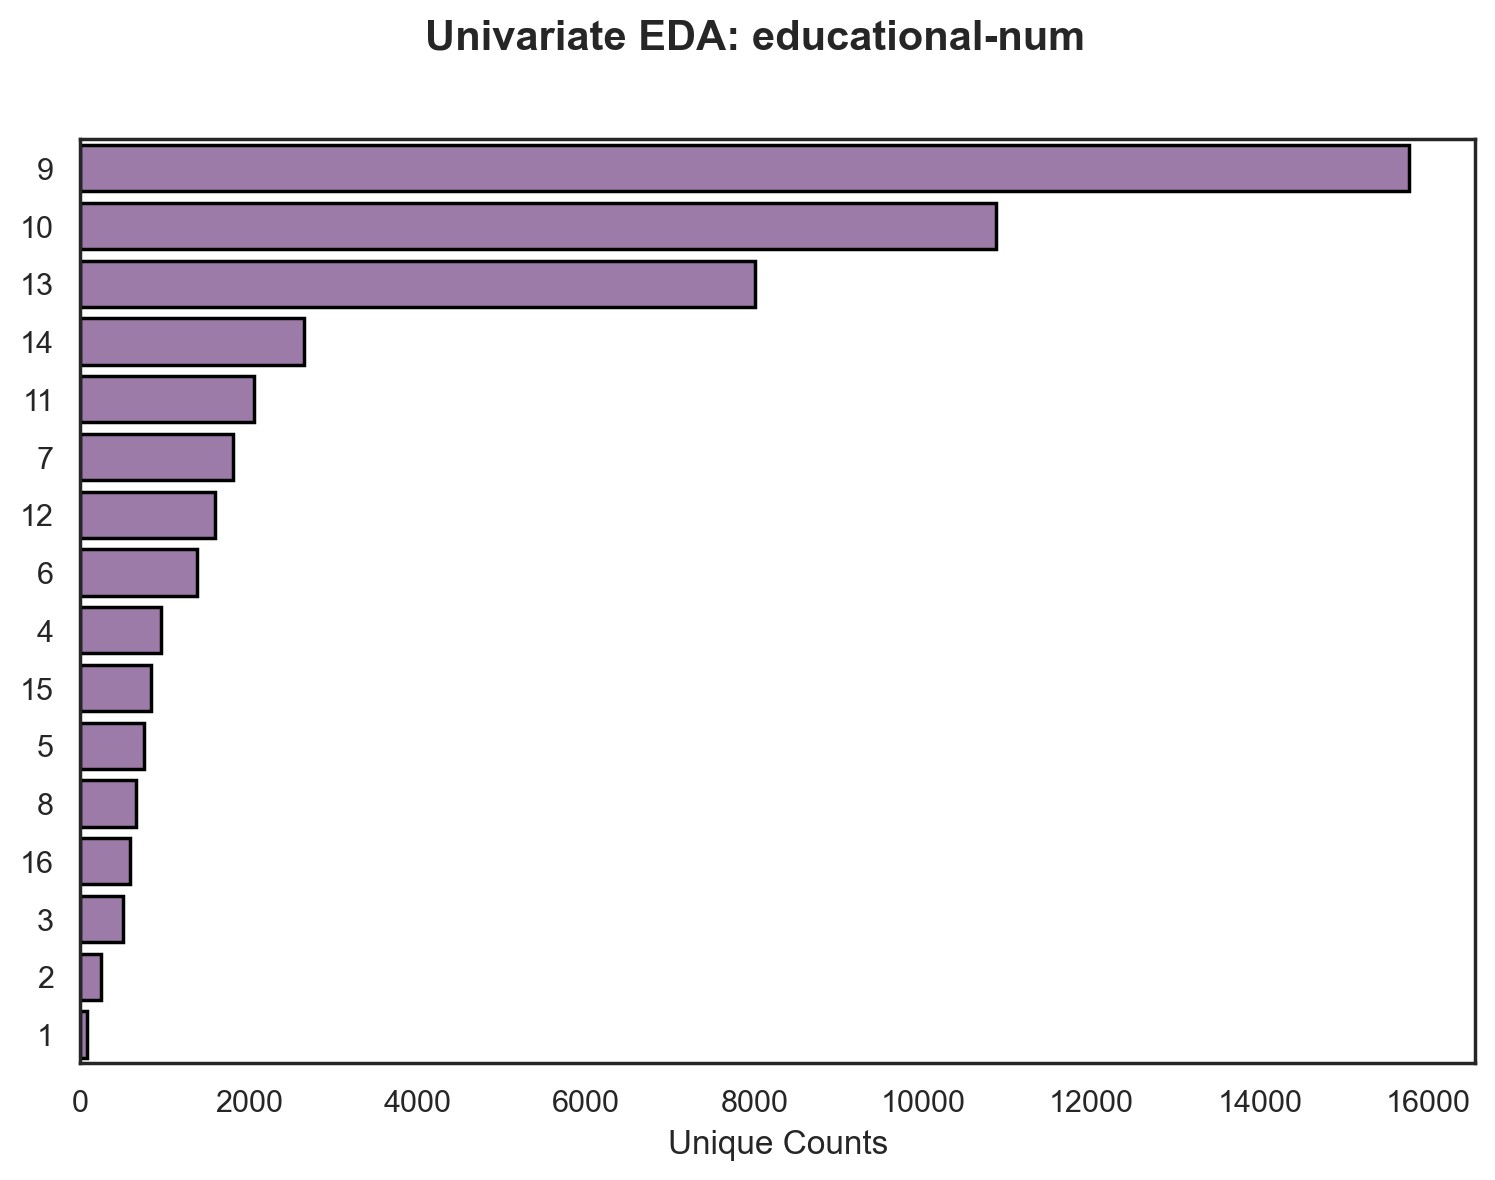

In [212]:
univariate_categorical_eda_udf (df_3, 'educational-num')

## **marital-status**

In [213]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'marital-status', print_counts=10)


marital-status: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 7 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
married-civ-spouse,"22,366",45.8%
never-married,"16,082",33.0%
divorced,"6,630",13.6%
separated,"1,530",3.1%
widowed,"1,518",3.1%
married-spouse-absent,627,1.3%
married-af-spouse,37,0.1%
Total,"48,790",100.0%


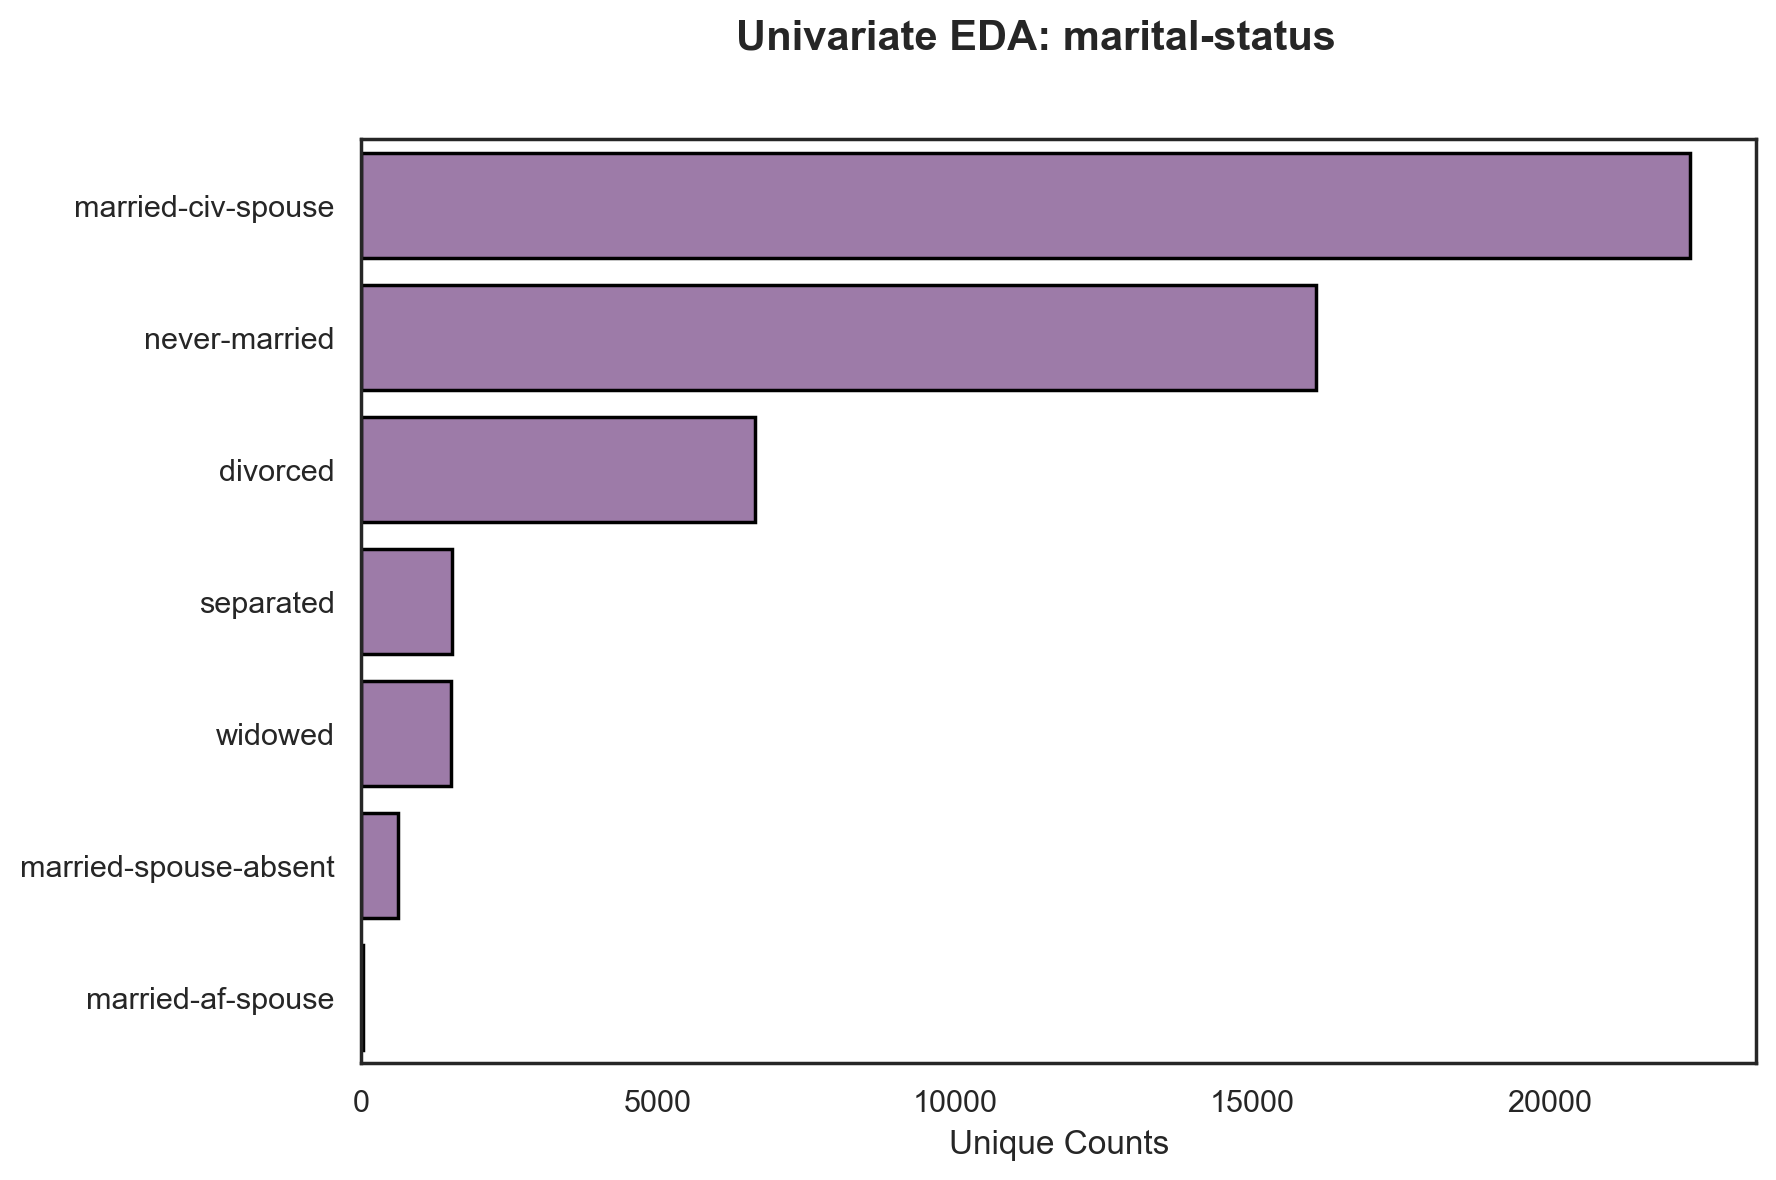

In [214]:
univariate_categorical_eda_udf (df_3, 'marital-status')

## **occupation**

In [215]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'occupation', print_counts=10)


occupation: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 15 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
prof-specialty,"6,165",12.6%
craft-repair,"6,102",12.5%
exec-managerial,"6,082",12.5%
adm-clerical,"5,606",11.5%
sales,"5,501",11.3%
other-service,"4,919",10.1%
machine-op-inspct,"3,017",6.2%
?,"2,805",5.7%
transport-moving,"2,355",4.8%
handlers-cleaners,"2,071",4.2%


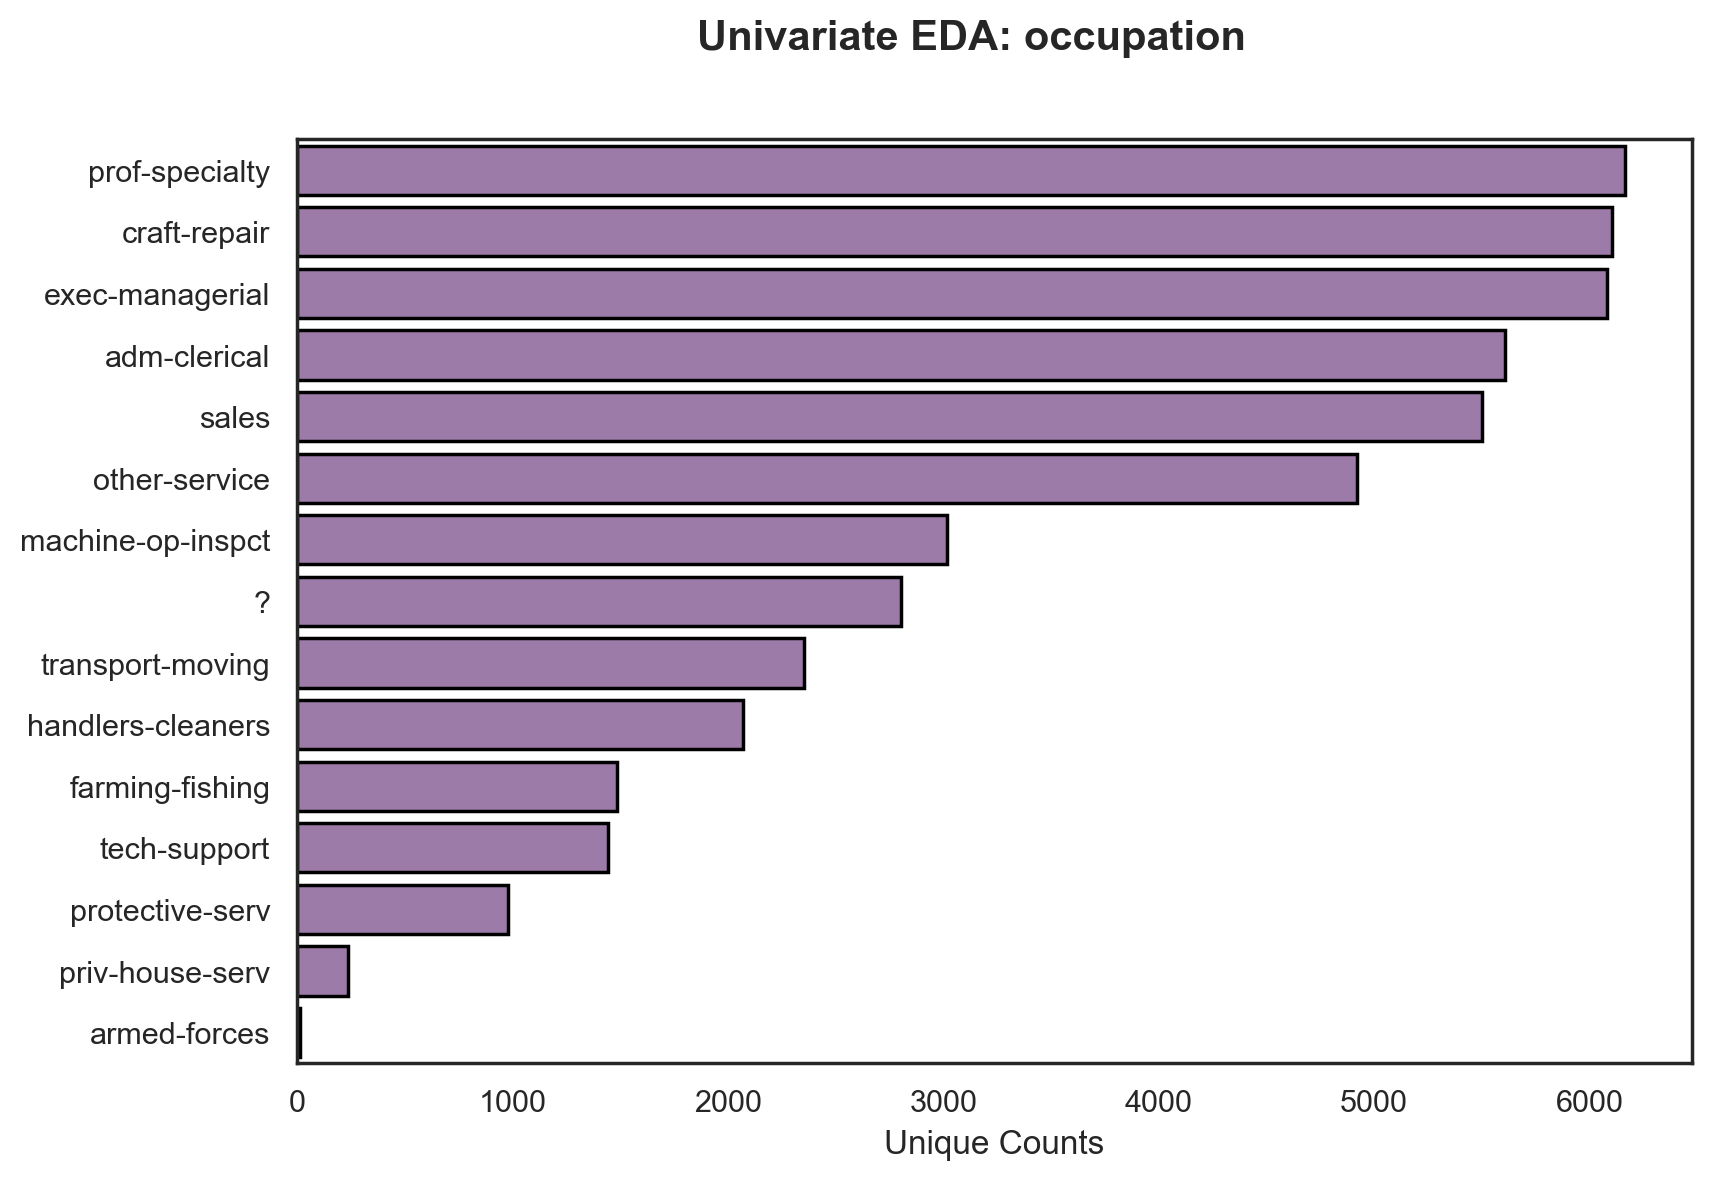

In [216]:
univariate_categorical_eda_udf (df_3, 'occupation')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. Based on the results of the cross tab for workclass, the "?" values for occupation can be fixed as 'Never-worked"

In [217]:
# replacing bad values
df_3['occupation'] = df_3['occupation'].replace({'?':'never-worked'})

In [218]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'occupation', print_counts=10)


occupation: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 15 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
prof-specialty,"6,165",12.6%
craft-repair,"6,102",12.5%
exec-managerial,"6,082",12.5%
adm-clerical,"5,606",11.5%
sales,"5,501",11.3%
other-service,"4,919",10.1%
machine-op-inspct,"3,017",6.2%
never-worked,"2,805",5.7%
transport-moving,"2,355",4.8%
handlers-cleaners,"2,071",4.2%


## **race**

In [219]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'race', print_counts=10)


race: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 5 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
white,"41,714",85.5%
black,"4,683",9.6%
asian-pac-islander,"1,517",3.1%
amer-indian-eskimo,470,1.0%
other,406,0.8%
Total,"48,790",100.0%


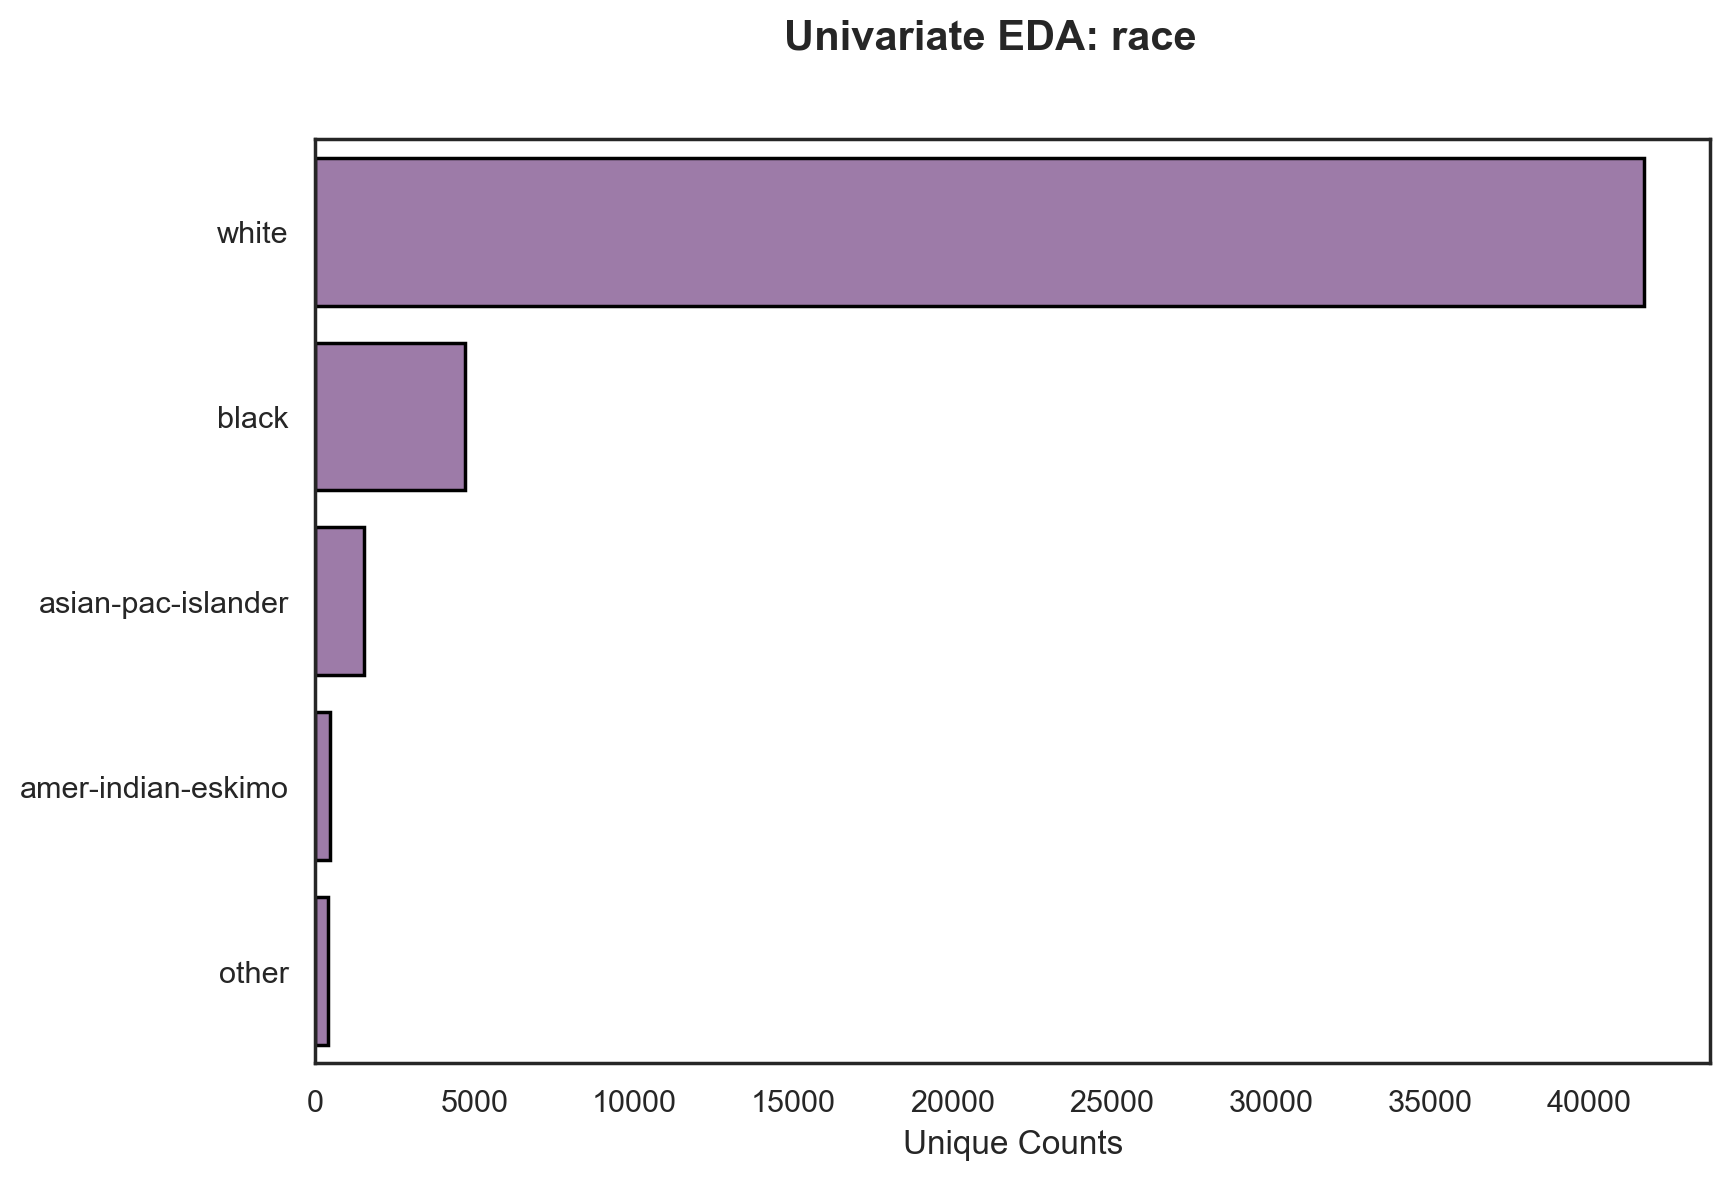

In [220]:
univariate_categorical_eda_udf (df_3, 'race')

## **gender**

In [221]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'gender', print_counts=10)


gender: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 2 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
male,"32,614",66.8%
female,"16,176",33.2%
Total,"48,790",100.0%


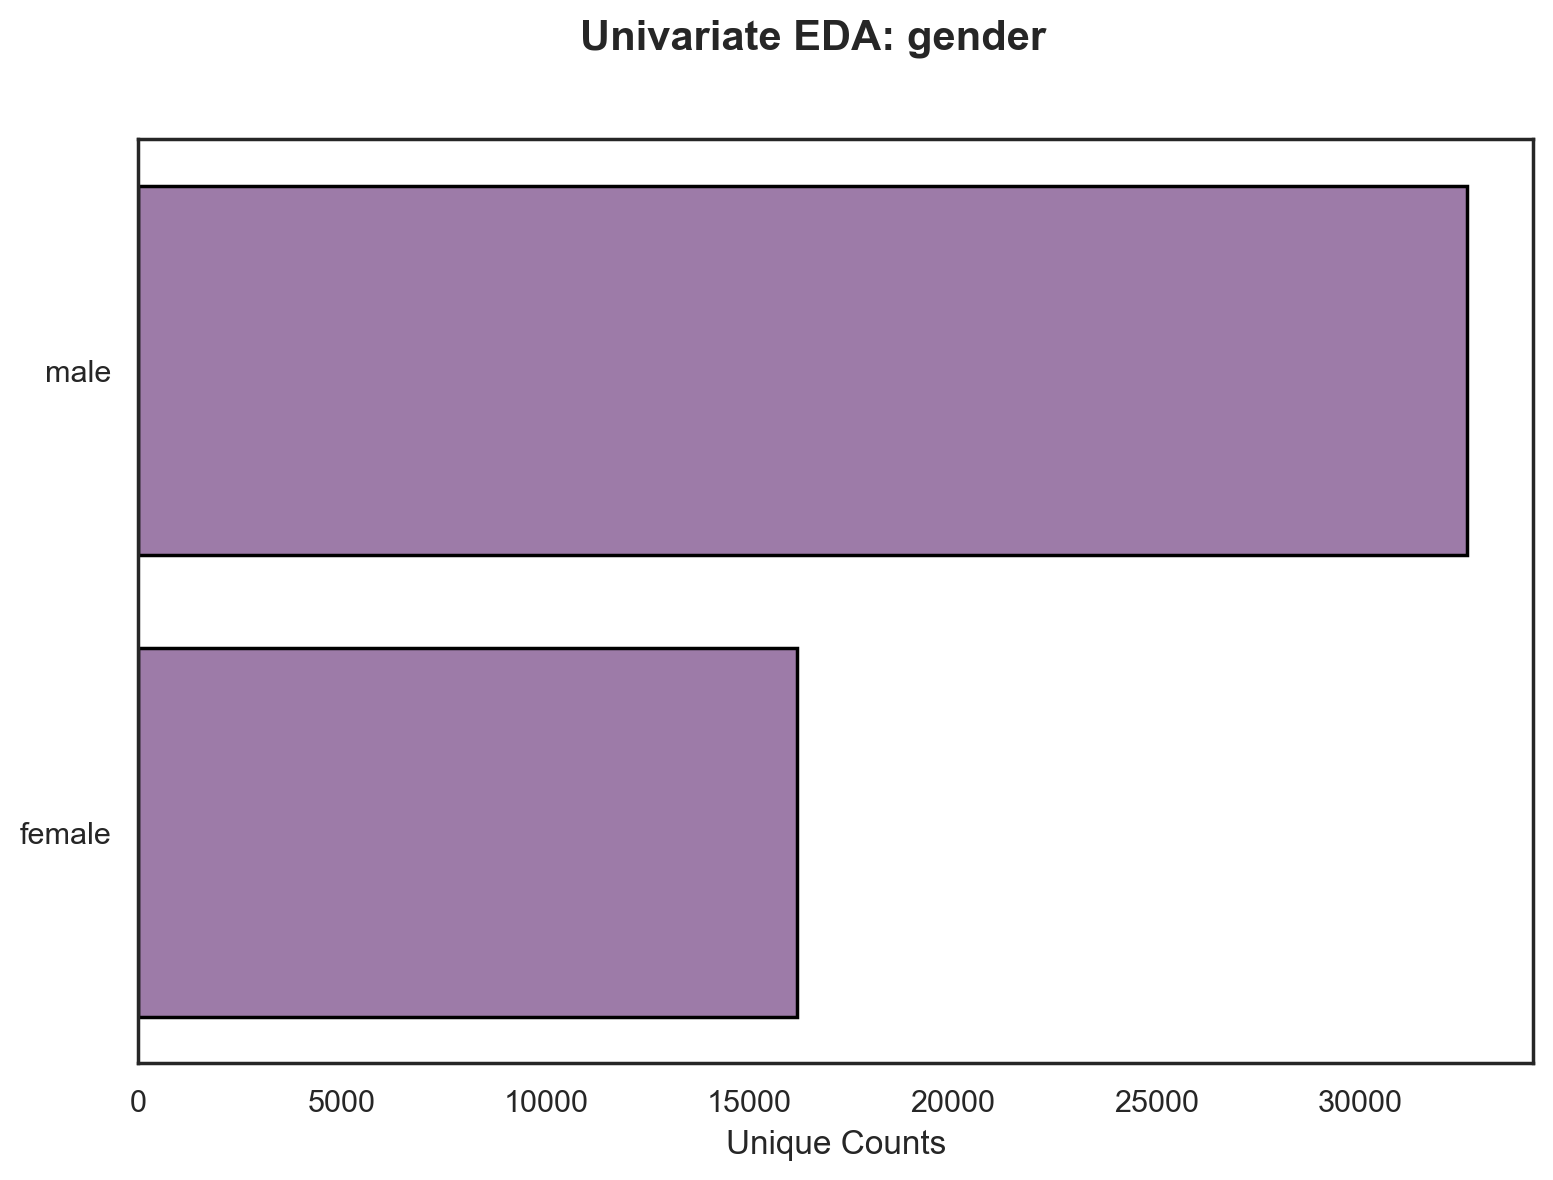

In [222]:
univariate_categorical_eda_udf (df_3, 'gender')

## **capital-gain**

In [223]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'capital-gain', print_counts=10)


capital-gain: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 4,035.
Low limit is: 0 with 0 (0.0%) below this.
High limit is: 0 with 4,035 (827.0%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


,Unique Counts,Percentage
0,"44,755",91.7%
15024,513,1.1%
7688,410,0.8%
7298,364,0.7%
99999,244,0.5%
3103,152,0.3%
5178,146,0.3%
5013,117,0.2%
4386,108,0.2%
8614,82,0.2%


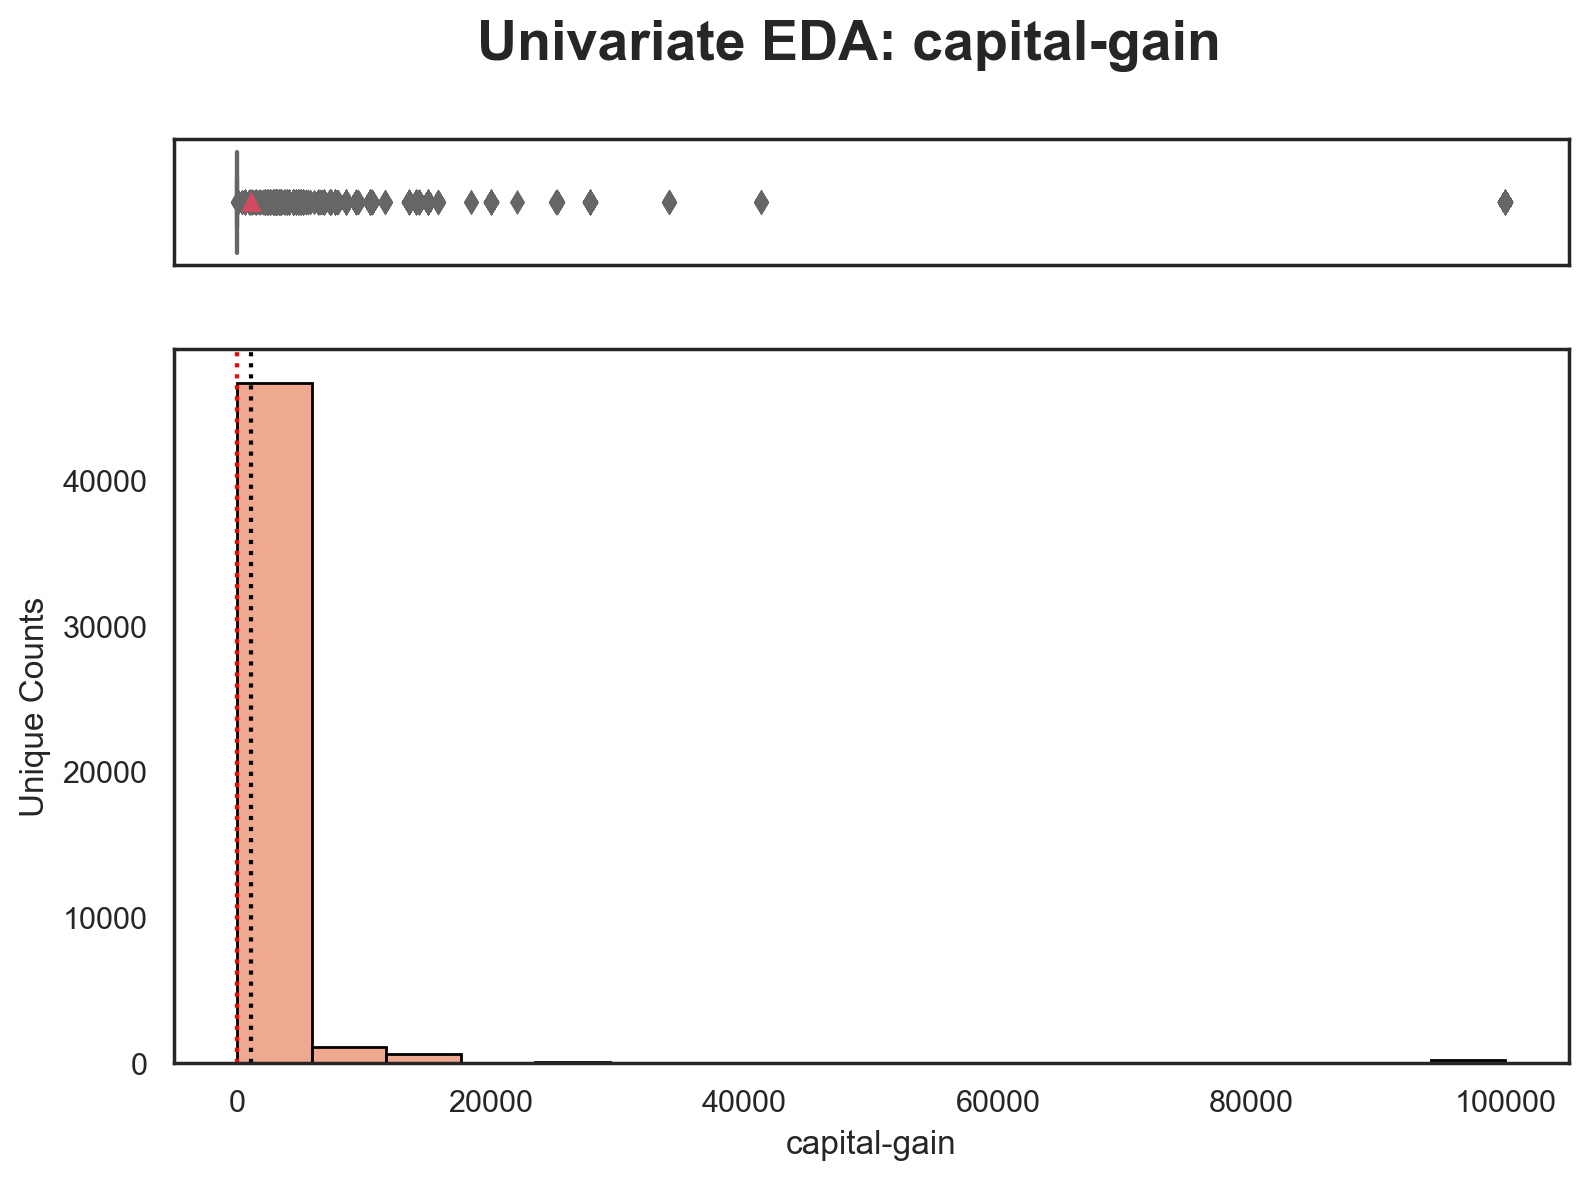

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='capital-gain', ylabel='Unique Counts'>)

In [224]:
univariate_numerical_eda_udf (df_3, 'capital-gain')

## **capital-loss**

In [225]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'capital-loss', print_counts=10)


capital-loss: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 2,282.
Low limit is: 0 with 0 (0.0%) below this.
High limit is: 0 with 2,282 (467.7%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


,Unique Counts,Percentage
0,"46,508",95.3%
1902,304,0.6%
1977,253,0.5%
1887,233,0.5%
2415,72,0.1%
1485,71,0.1%
1848,67,0.1%
1602,62,0.1%
1590,62,0.1%
1876,59,0.1%


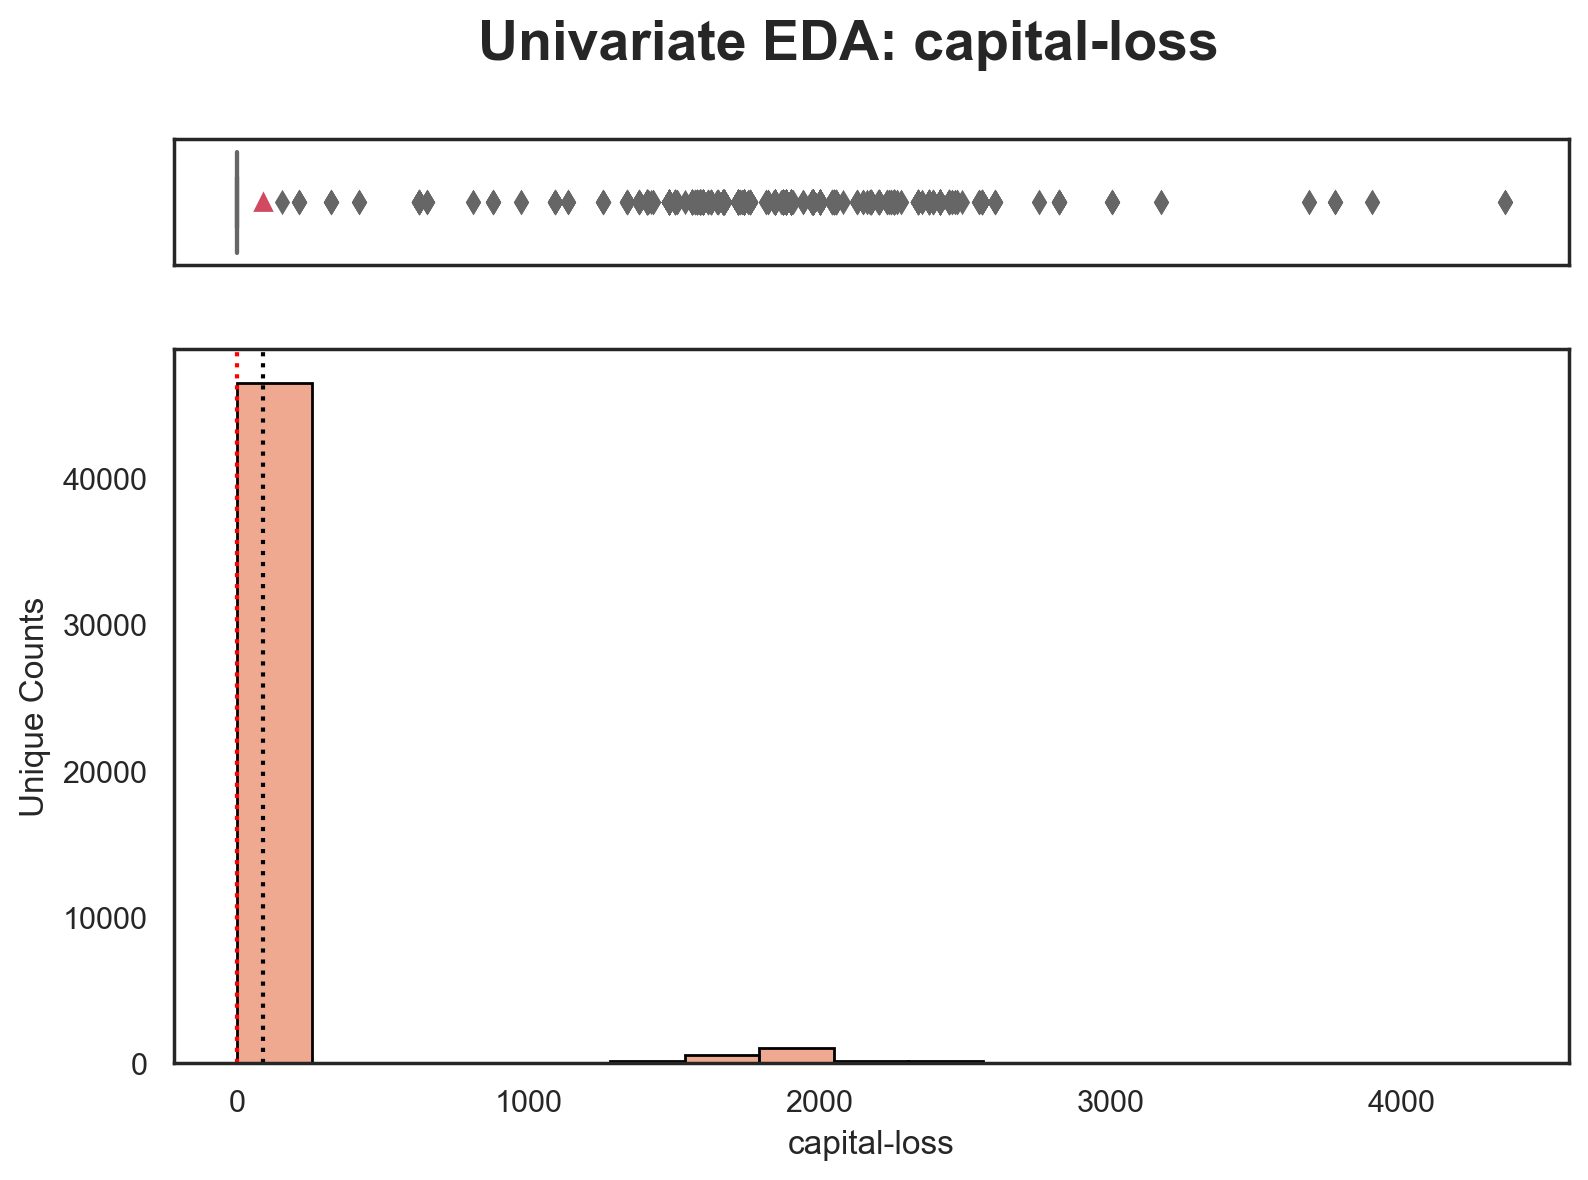

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='capital-loss', ylabel='Unique Counts'>)

In [226]:
univariate_numerical_eda_udf (df_3, 'capital-loss')

## **hours-per-week**

In [227]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'hours-per-week', print_counts=10)


hours-per-week: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 13,486.
Low limit is: 32 with 8,277 (1696.5%) below this.
High limit is: 52 with 5,209 (1067.6%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


,Unique Counts,Percentage
40,"22,773",46.7%
50,"4,242",8.7%
45,"2,715",5.6%
60,"2,177",4.5%
35,"1,934",4.0%
20,"1,860",3.8%
30,"1,699",3.5%
55,"1,050",2.2%
25,957,2.0%
48,768,1.6%


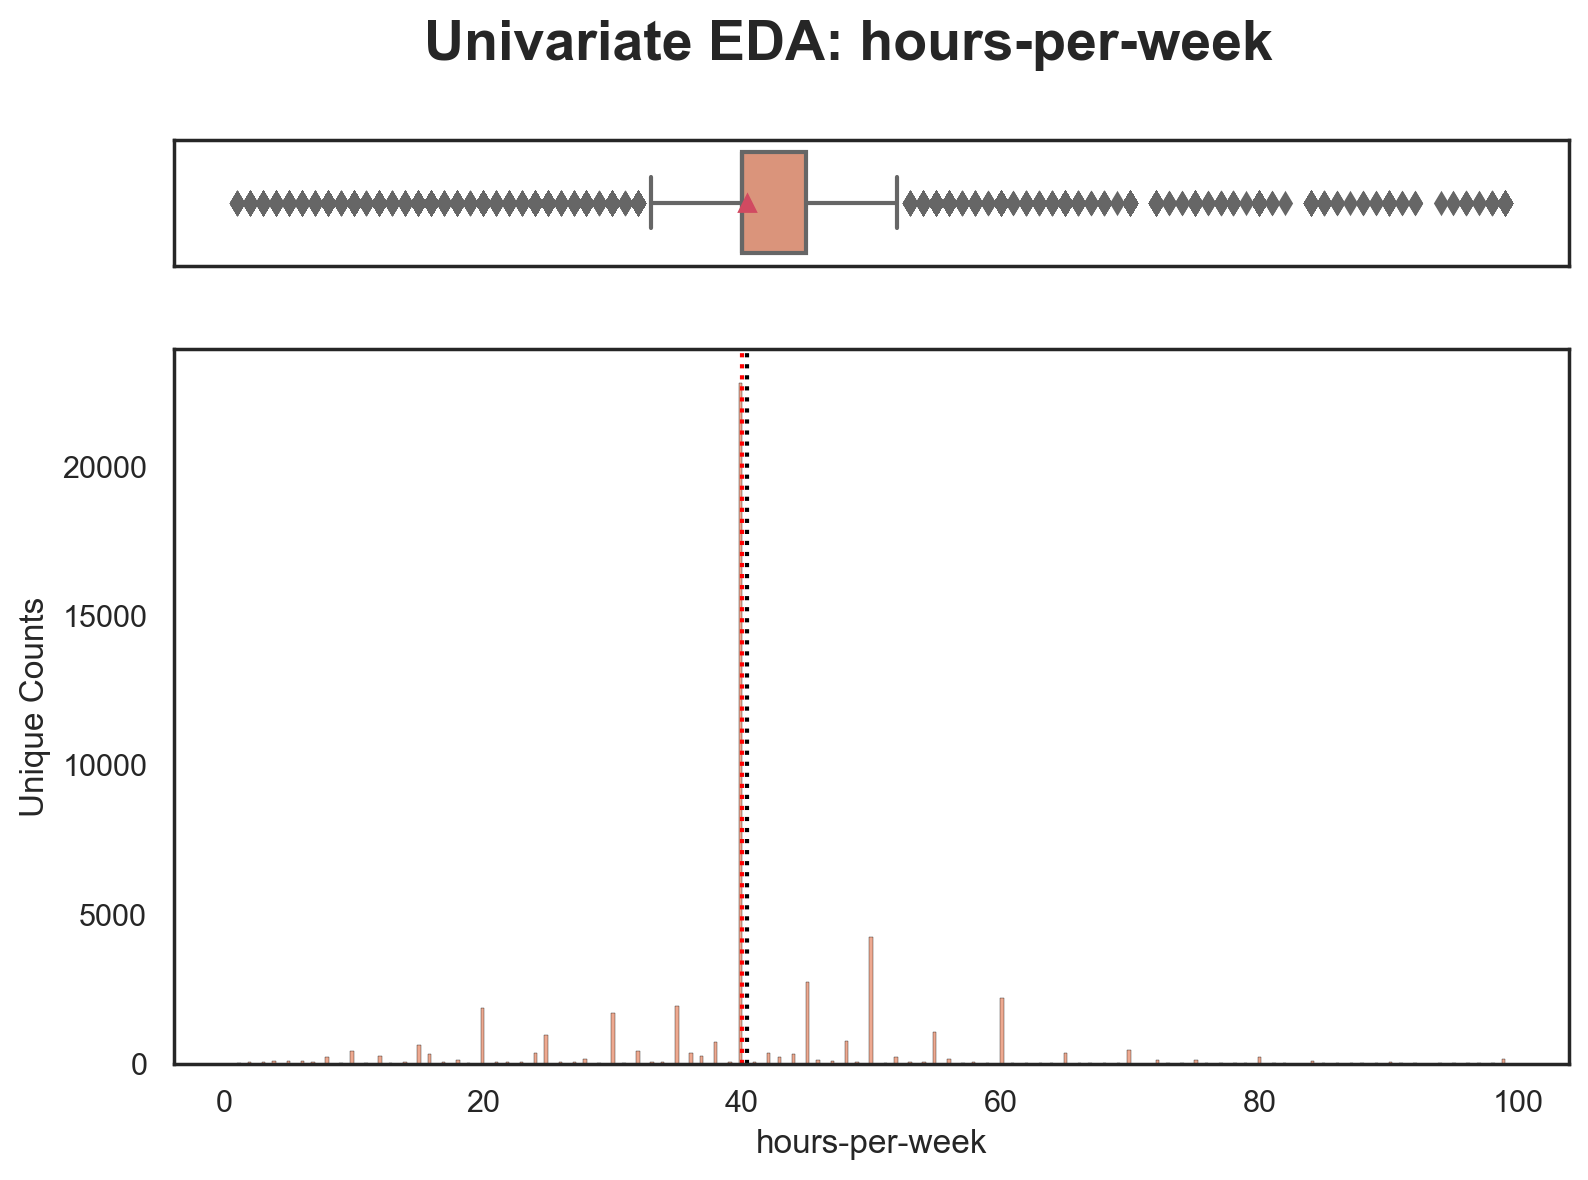

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='hours-per-week', ylabel='Unique Counts'>)

In [228]:
univariate_numerical_eda_udf (df_3, 'hours-per-week')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Huge amount of Outliers detected 

## **native-country**

In [229]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'native-country', print_counts=10)


native-country: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 42 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
united-states,"43,792",89.8%
mexico,943,1.9%
?,856,1.8%
philippines,294,0.6%
germany,206,0.4%
puerto-rico,184,0.4%
canada,182,0.4%
el-salvador,155,0.3%
india,151,0.3%
cuba,138,0.3%


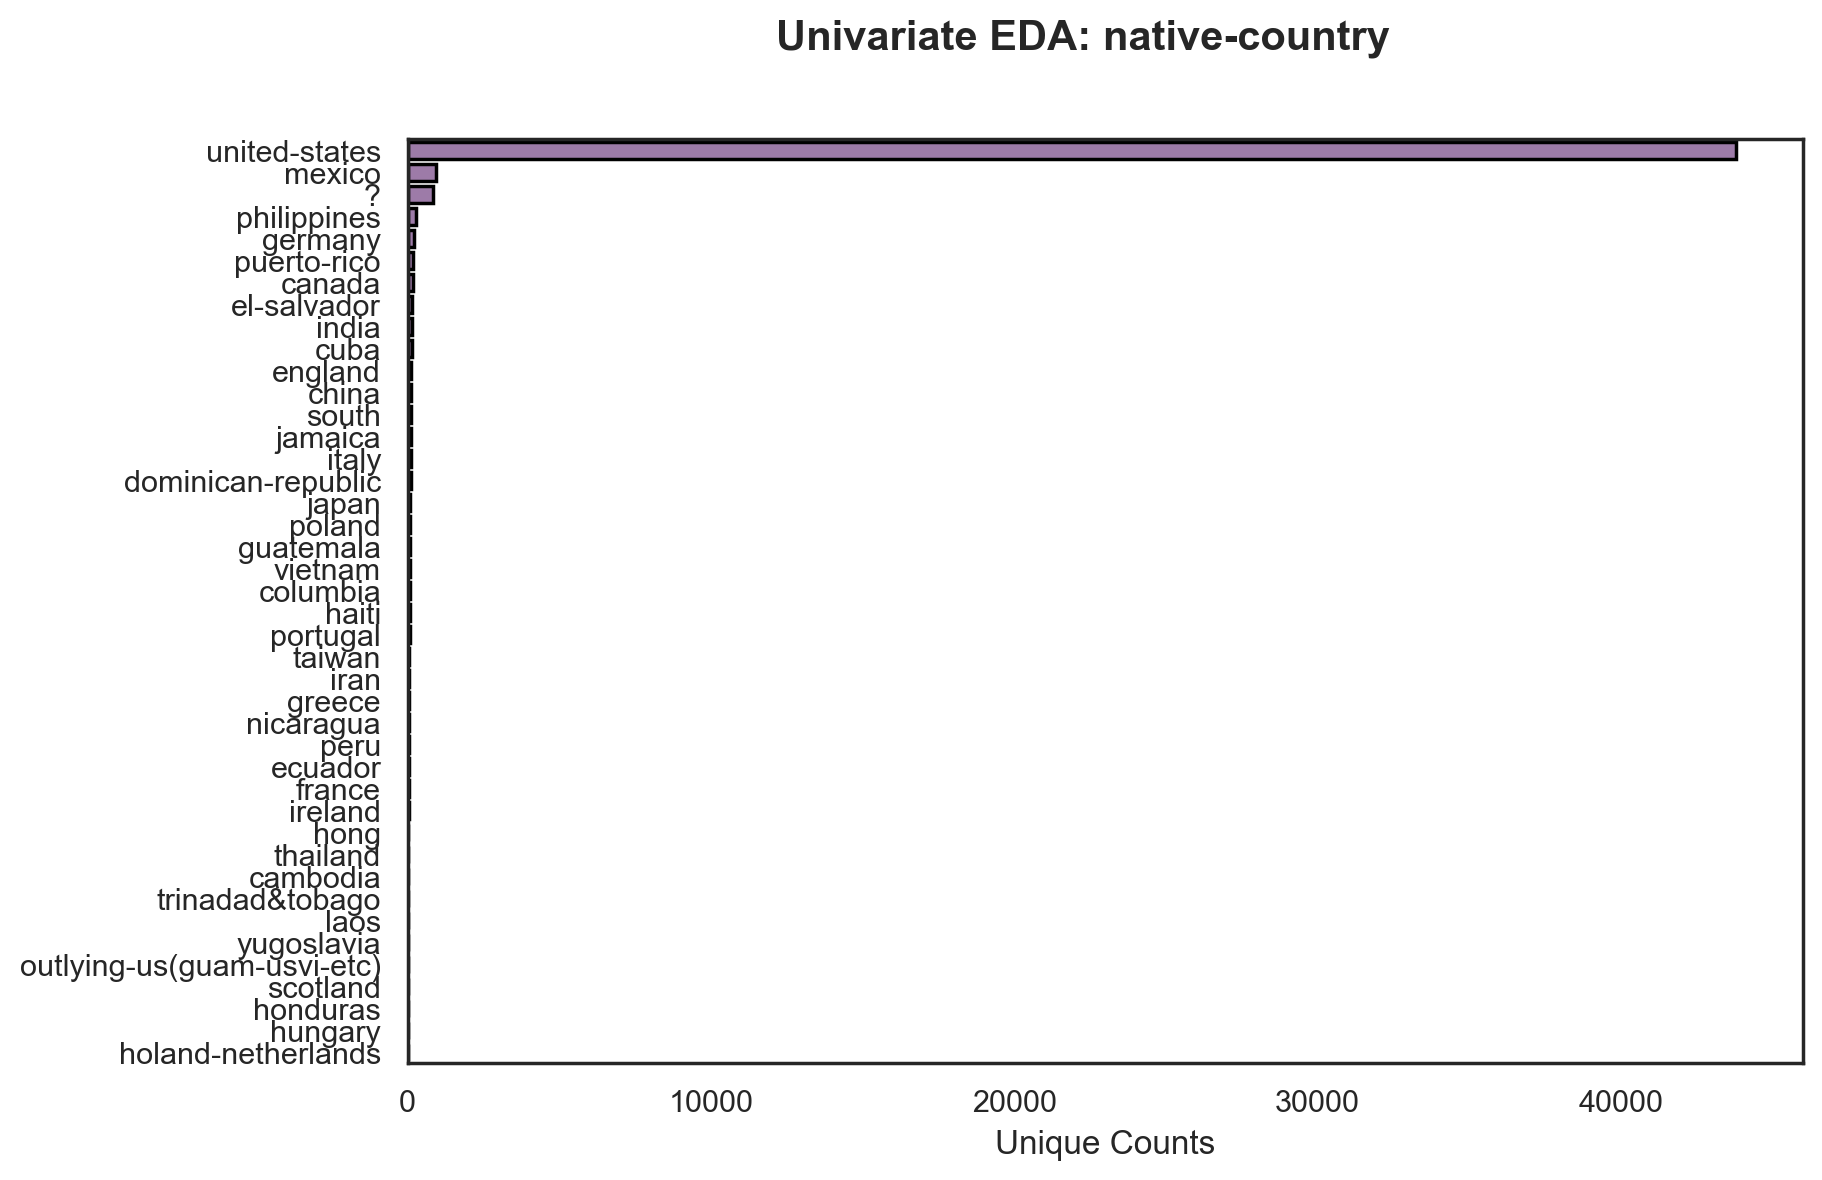

In [230]:
univariate_categorical_eda_udf (df_3, 'native-country')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Recommended to impute the "?" with most frequent value in the ML preprocessing stage

## **income**

In [231]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'income', print_counts=10)


income: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 2 unique values.

Categorical Column: All Sorted Values (NaN first)


,Unique Counts,Percentage
<=50k,"37,109",76.1%
>50k,"11,681",23.9%
Total,"48,790",100.0%


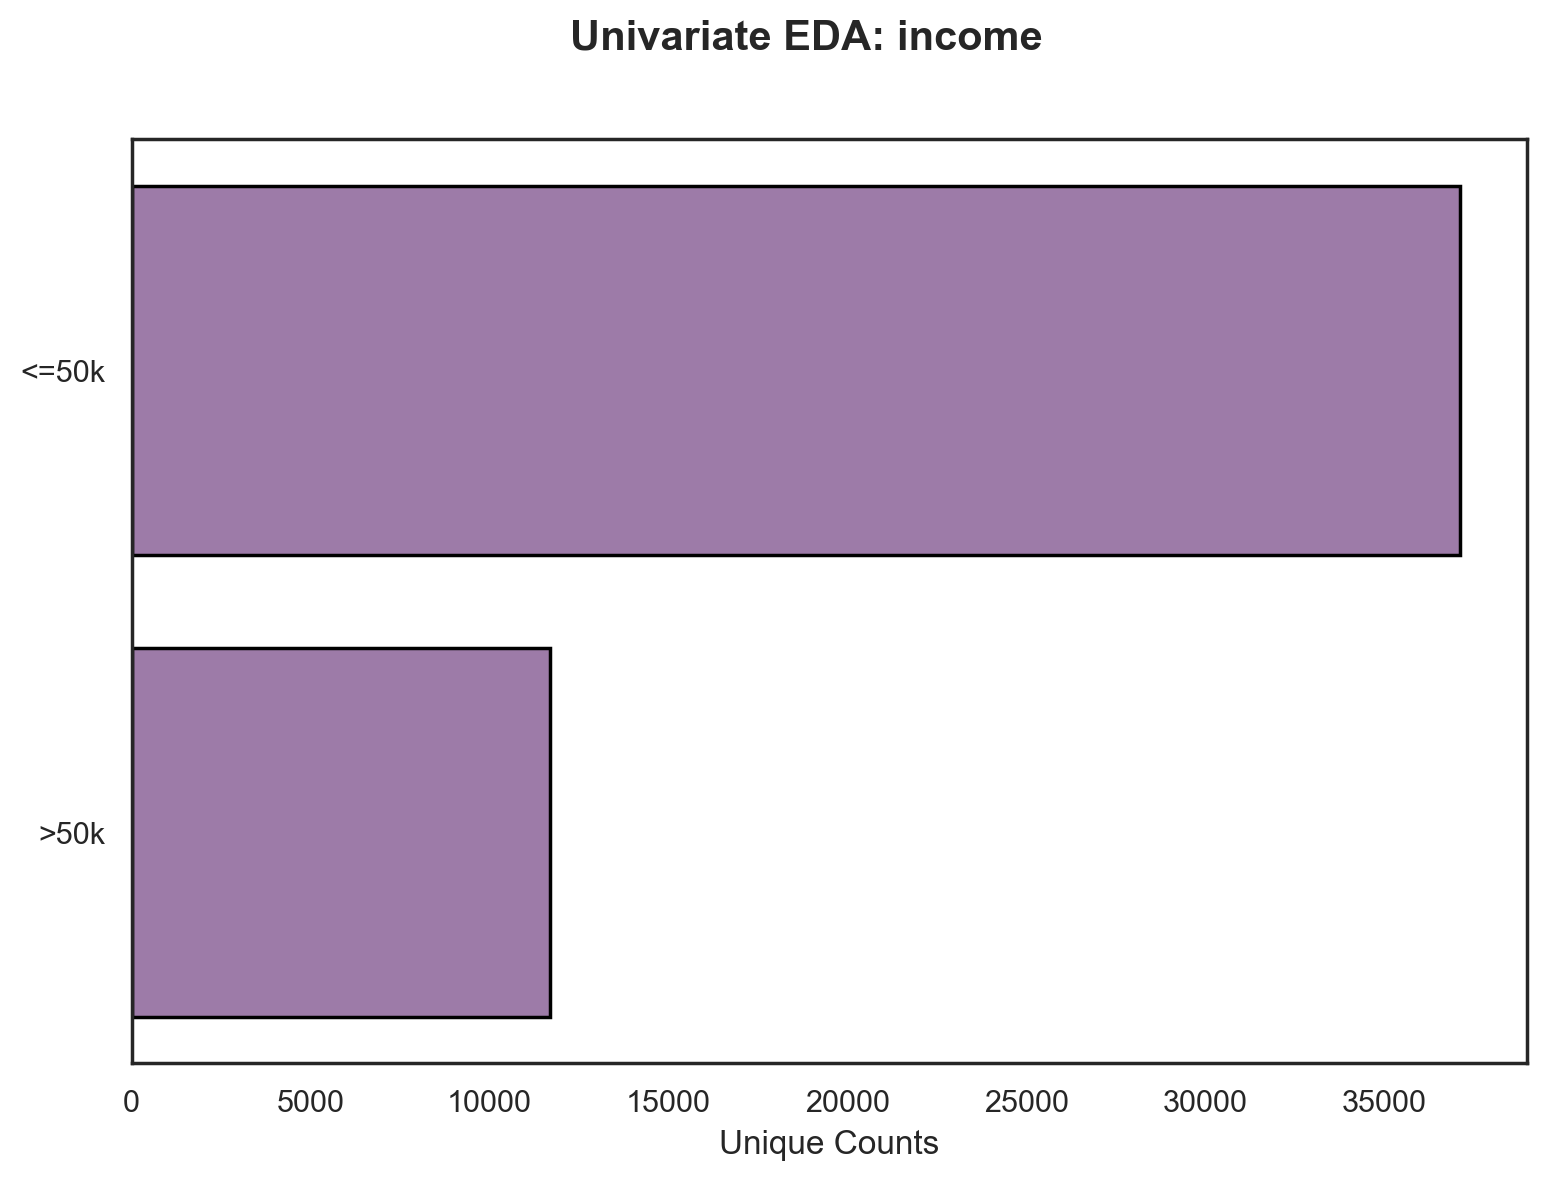

In [232]:
univariate_categorical_eda_udf (df_3, 'income')

<h1 style="color:green"><b>Missing values</b> </h1> 

In [234]:
# overall counts and missing values in the data frame
missing_values_udf (df_3)

,Total Rows,Total Unique Counts,Missing Value Counts,Missing Value Percentage
age,"48,790",74,0,0.00%
workclass,"48,790",8,0,0.00%
educational-num,"48,790",16,0,0.00%
marital-status,"48,790",7,0,0.00%
occupation,"48,790",15,0,0.00%
race,"48,790",5,0,0.00%
gender,"48,790",2,0,0.00%
capital-gain,"48,790",123,0,0.00%
capital-loss,"48,790",99,0,0.00%
hours-per-week,"48,790",96,0,0.00%


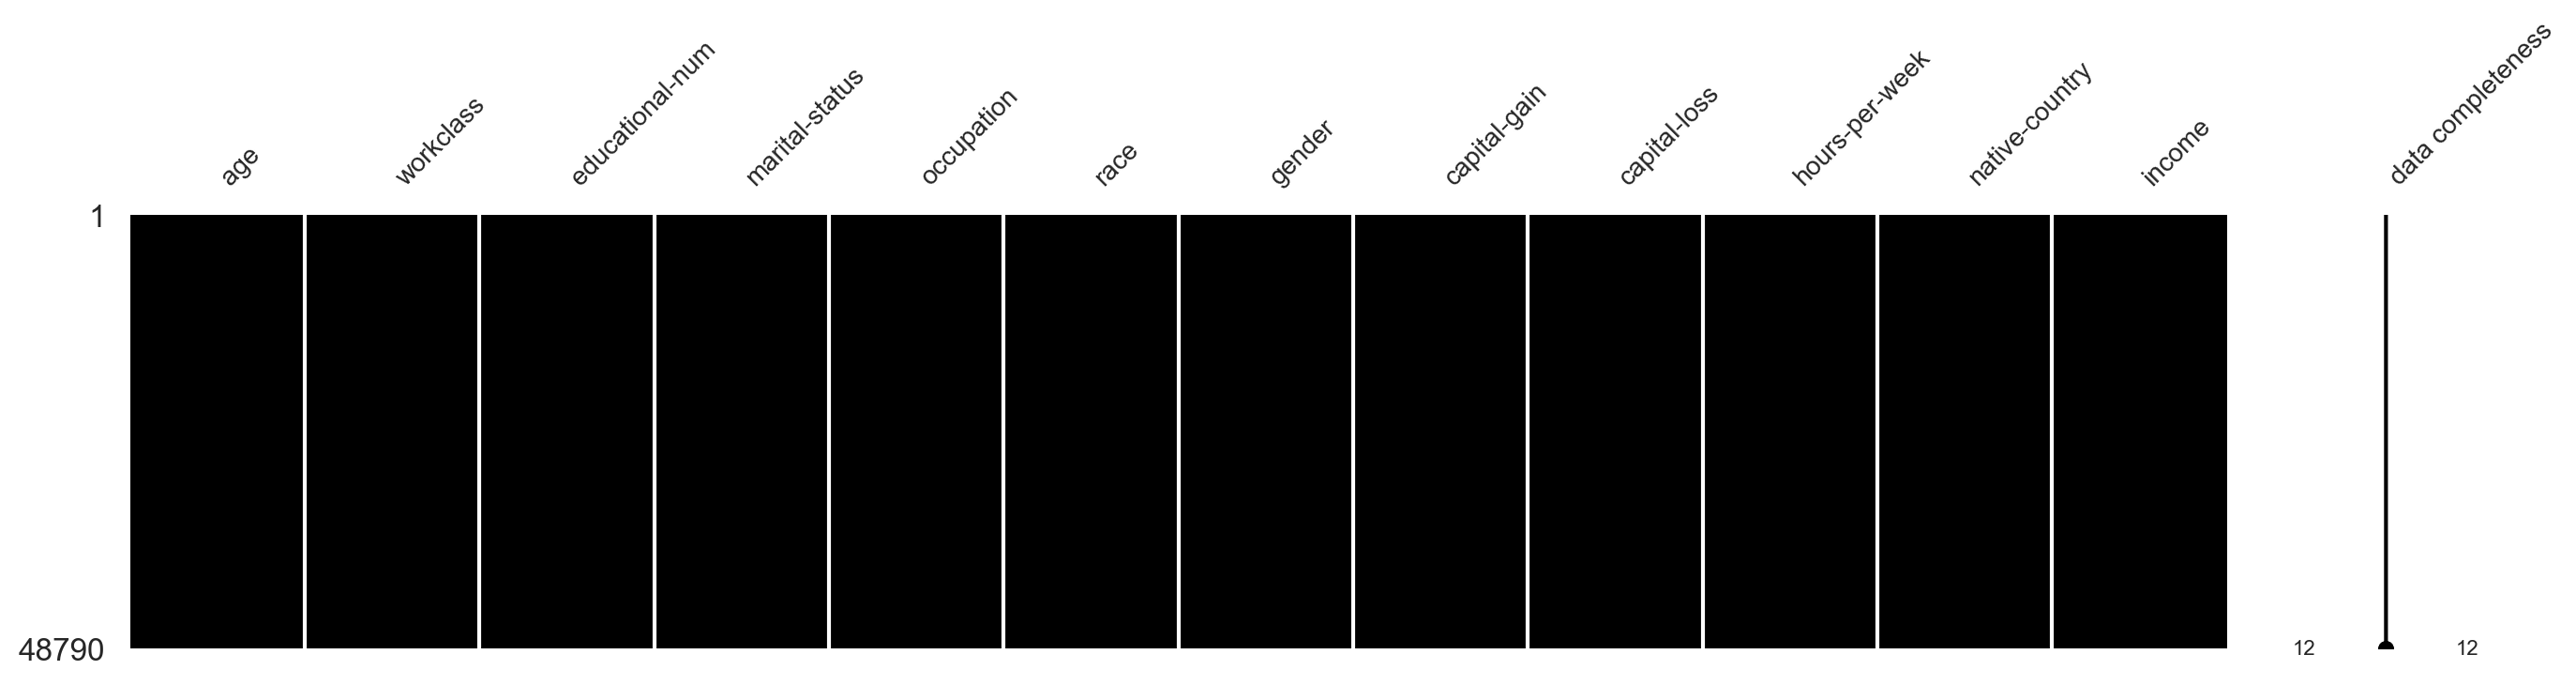

In [235]:
# Display missing values by column
msno.matrix(df_3, figsize=(16,3), labels=True, 
            fontsize=10, sort="descending", color=(0,0,0));

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

No missing values

<h1 style="color:green"><b>Exploratory Analysis</b> </h1> 

## age & income 

<AxesSubplot: xlabel='income', ylabel='age'>

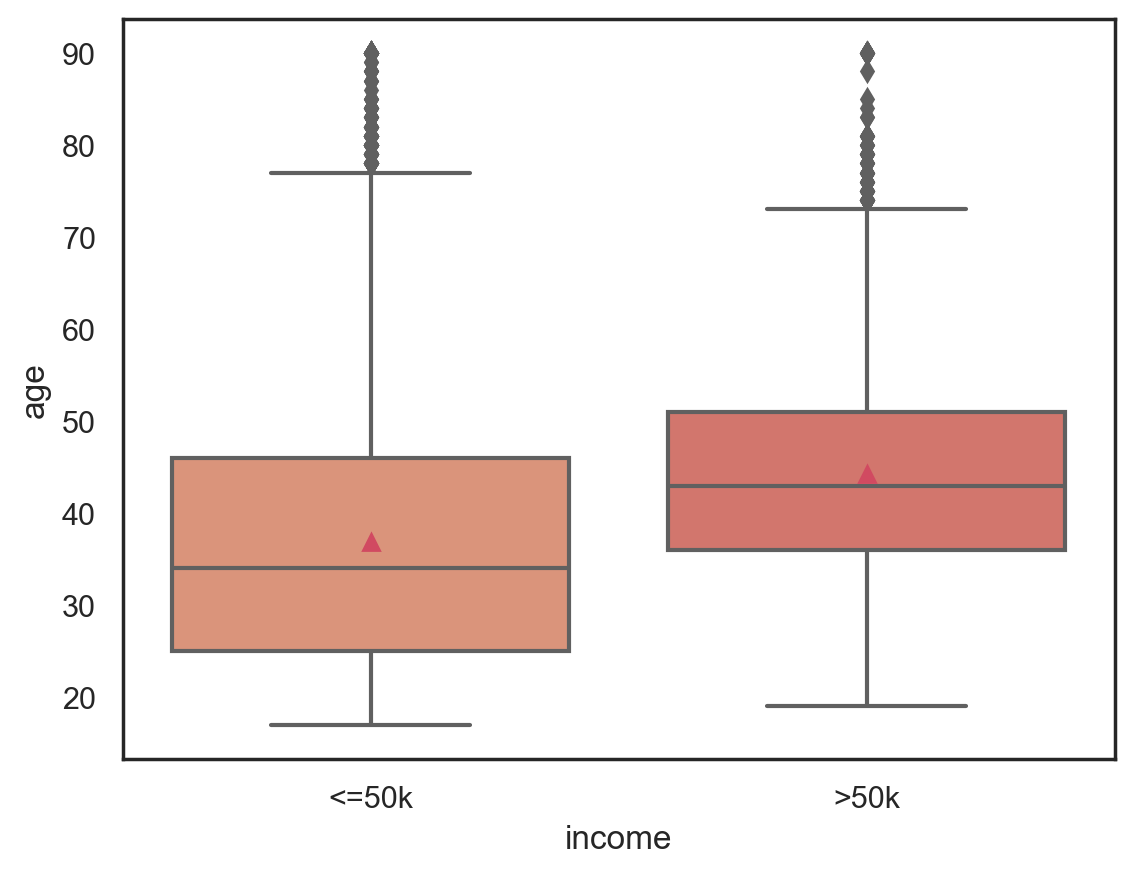

In [238]:
sns.boxplot(data=df_3, x = 'income', y='age', showmeans=True)

## capital-gain & income 

<AxesSubplot: xlabel='income', ylabel='capital-gain'>

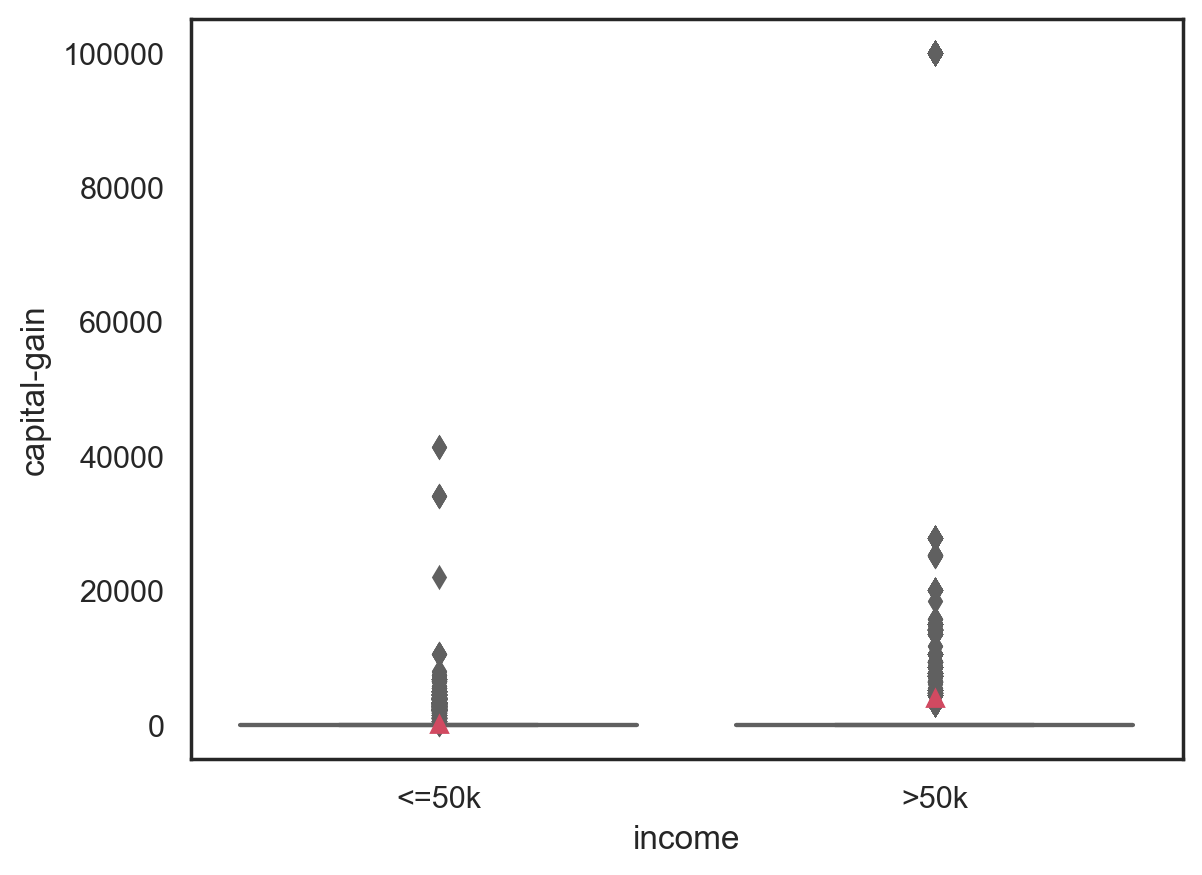

In [239]:
sns.boxplot(data=df_3, x = 'income', y='capital-gain', showmeans=True)

## capital-loss & income 

<AxesSubplot: xlabel='income', ylabel='capital-loss'>

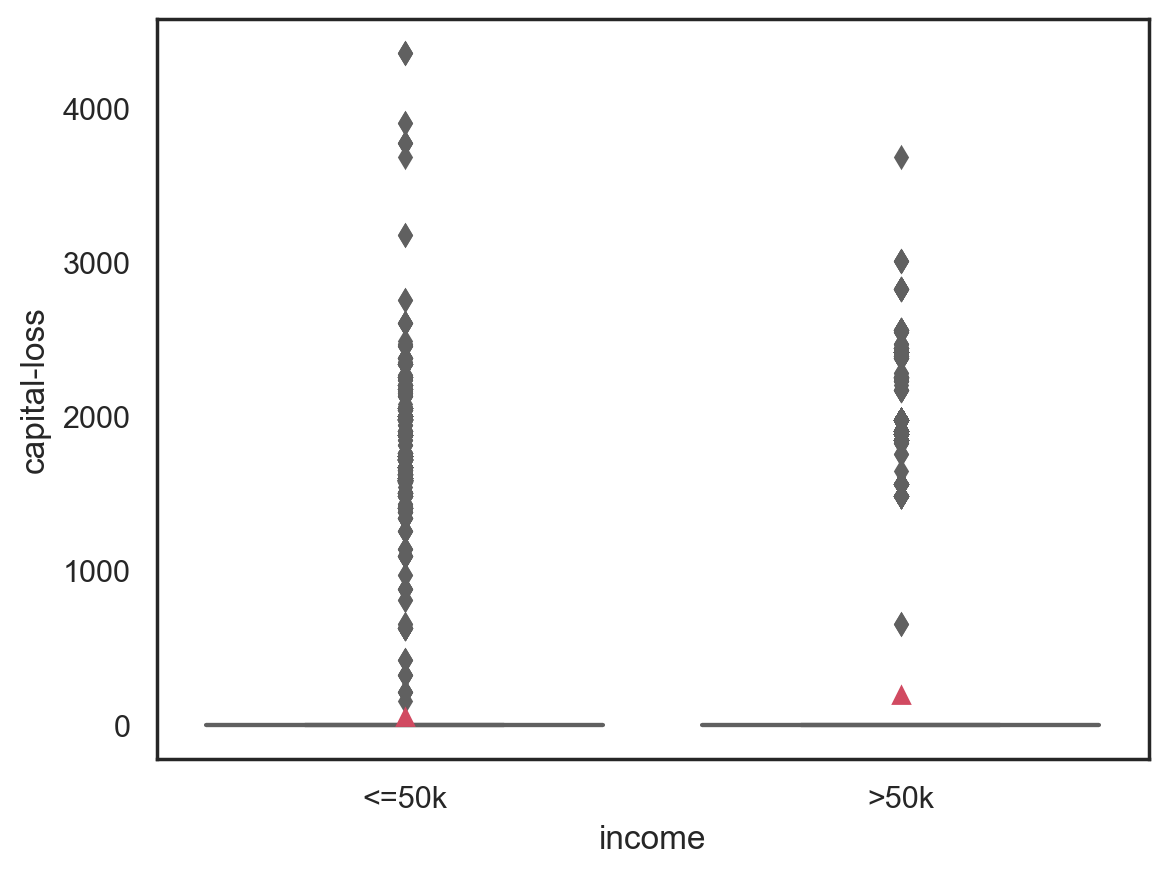

In [240]:
sns.boxplot(data=df_3, x = 'income', y='capital-loss', showmeans=True)

## hours per week & income

<AxesSubplot: xlabel='income', ylabel='hours-per-week'>

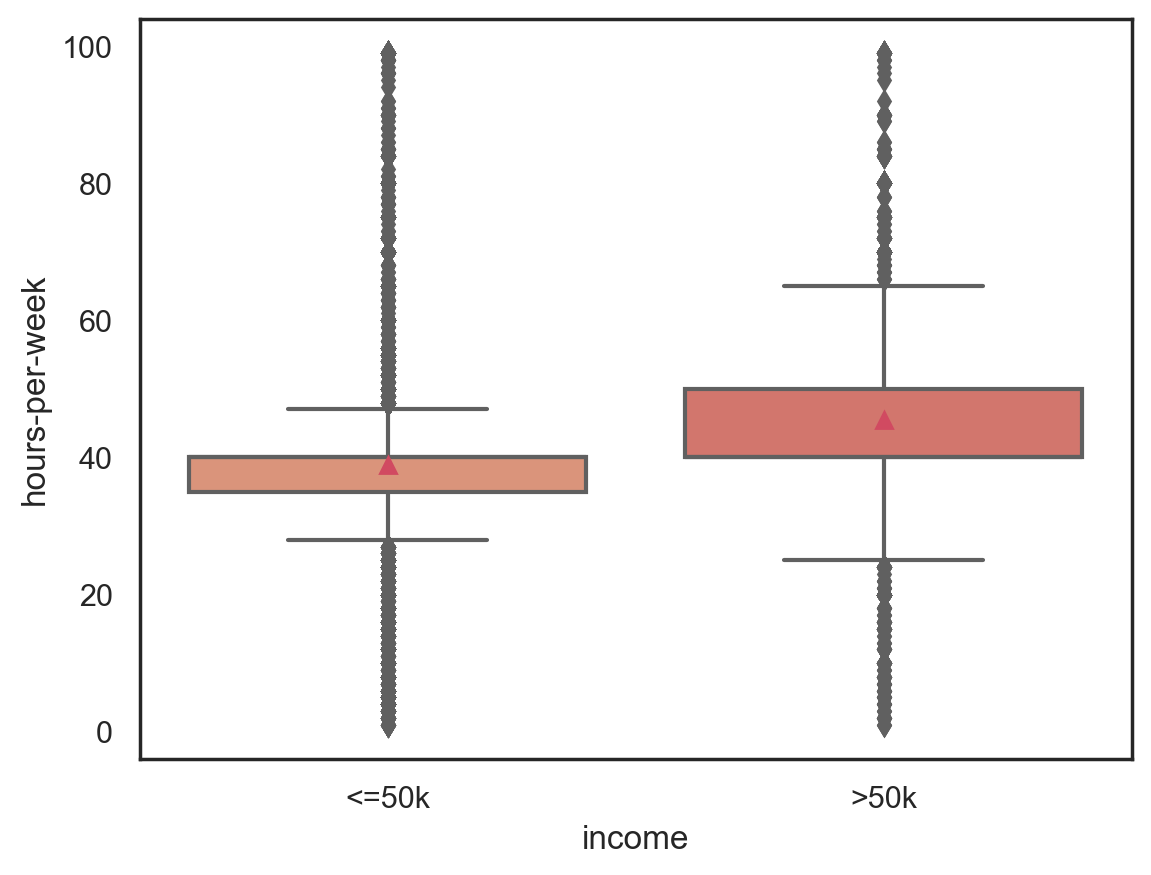

In [242]:
sns.boxplot(data=df_3, x = 'income', y='hours-per-week', showmeans=True)

## workclass & income

<AxesSubplot: xlabel='income', ylabel='Count'>

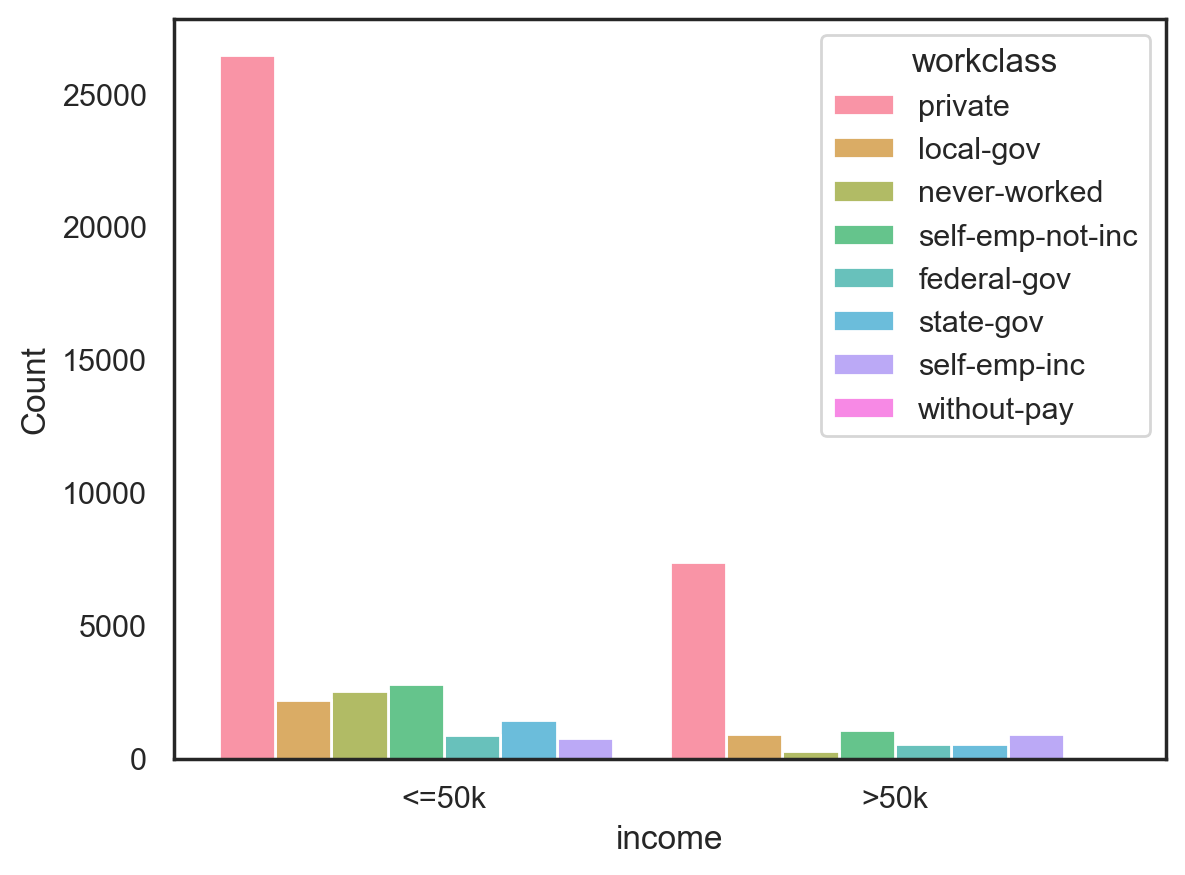

In [247]:
sns.histplot(binwidth=1,
            x='income',
            hue='workclass',
            data=df_3,
            stat="count",
            multiple="dodge")

## education number & income

<AxesSubplot: xlabel='income', ylabel='Count'>

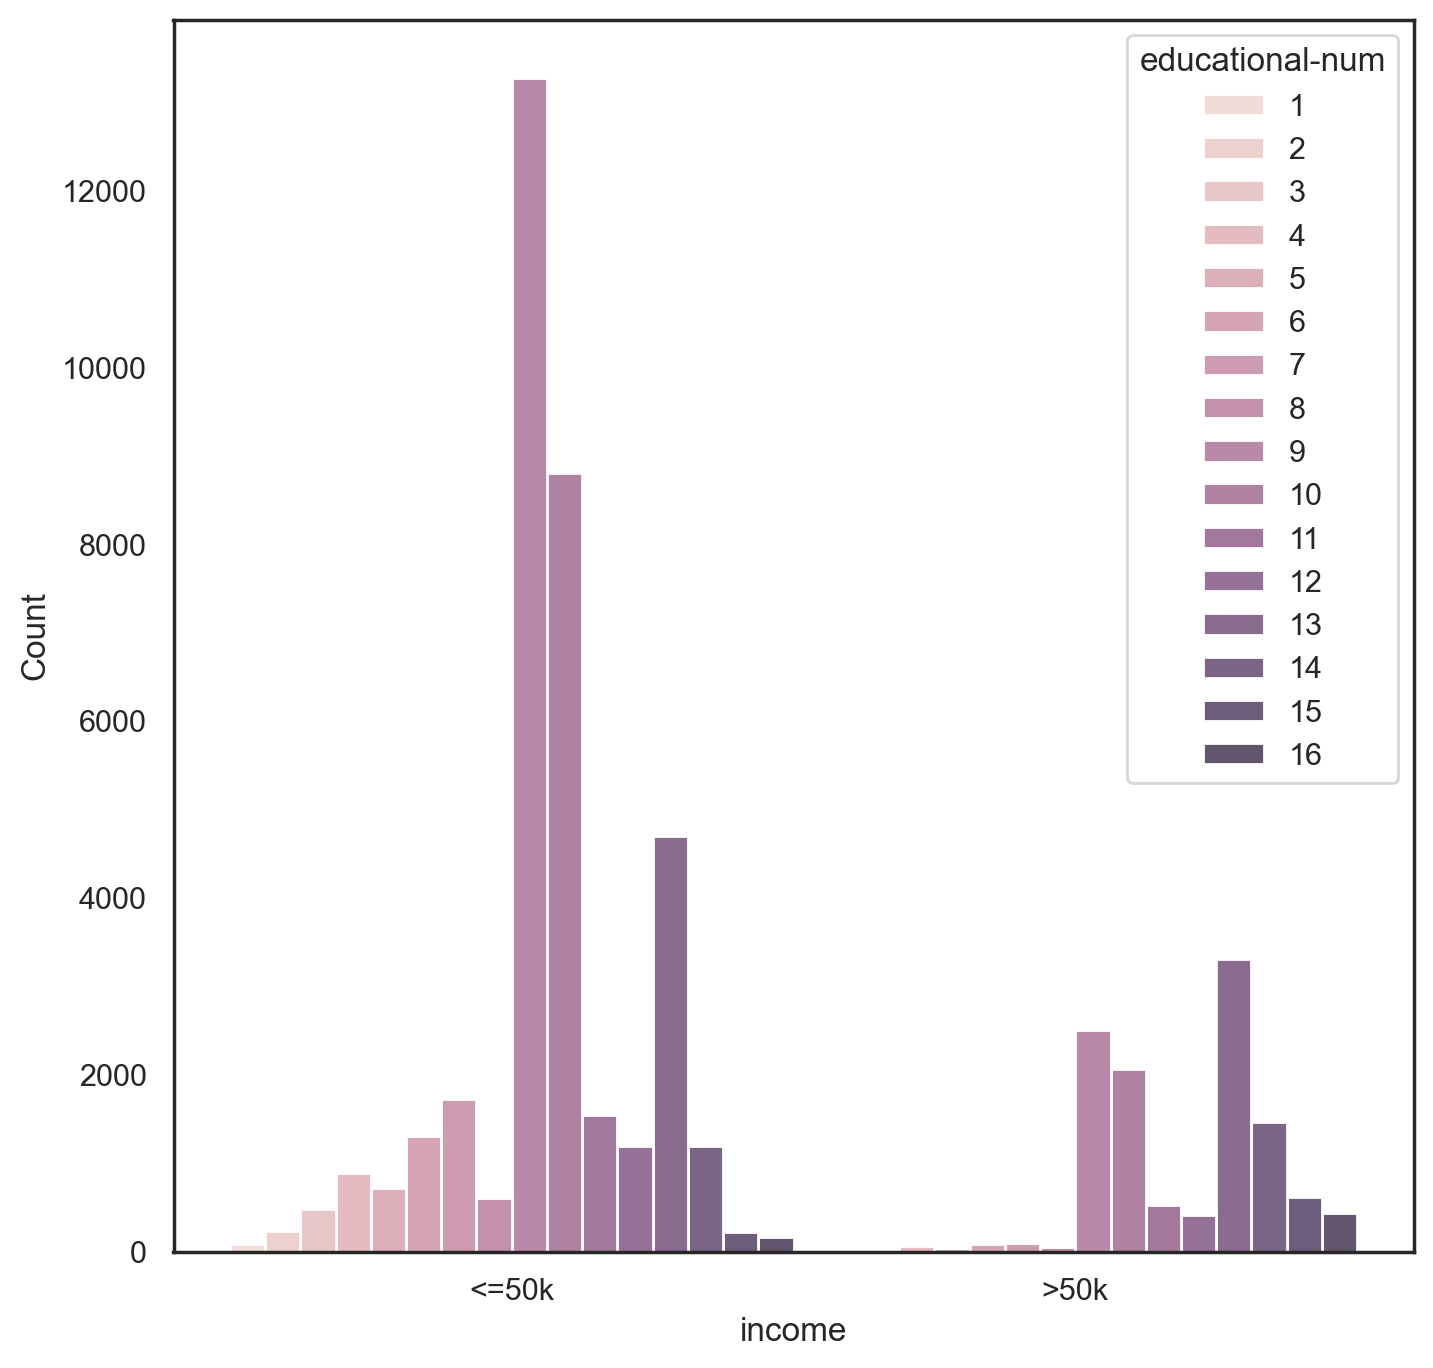

In [256]:
plt.figure(figsize=(8,8))
sns.histplot(binwidth=1,
            x='income',
            hue='educational-num',
            data=df_3,
            stat="count",
            multiple="dodge")

## marital status & income

<AxesSubplot: xlabel='income', ylabel='Count'>

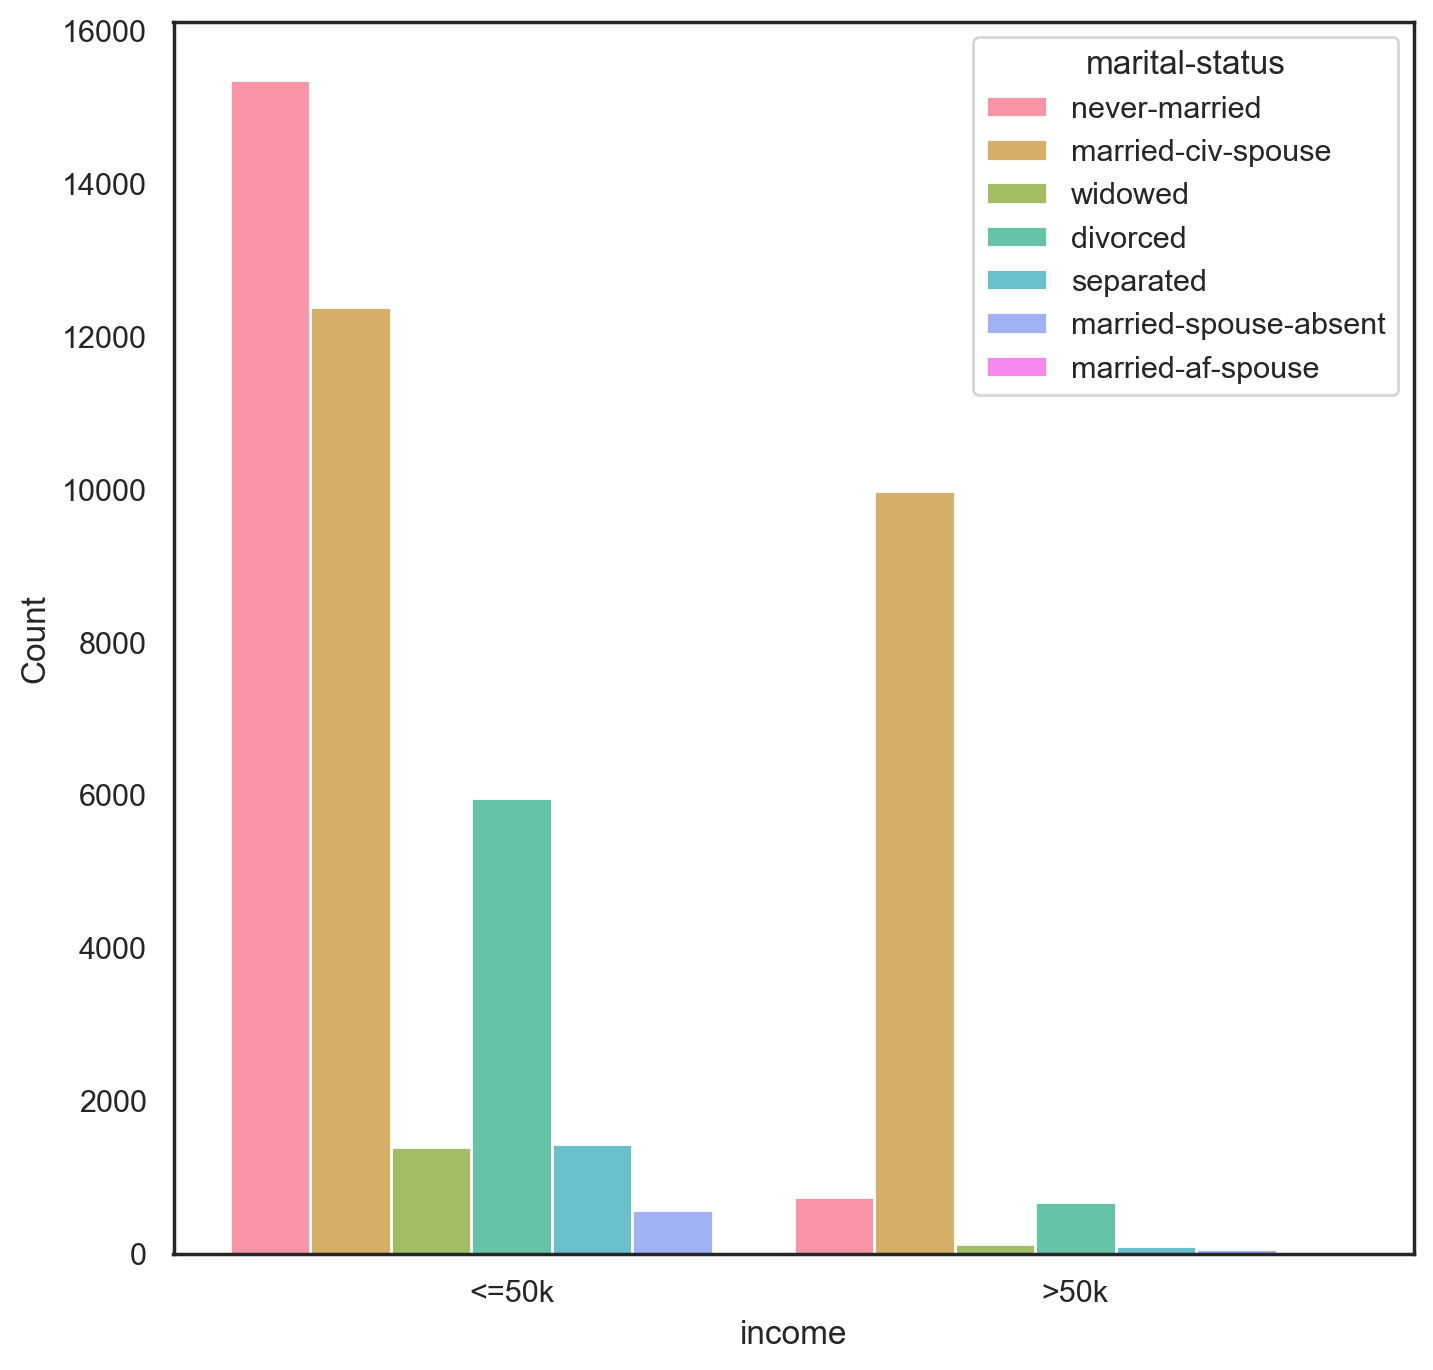

In [258]:
plt.figure(figsize=(8,8))
sns.histplot(binwidth=1,
            x='income',
            hue='marital-status',
            data=df_3,
            stat="count",
            multiple="dodge")

## occupation & income

<AxesSubplot: xlabel='income', ylabel='Count'>

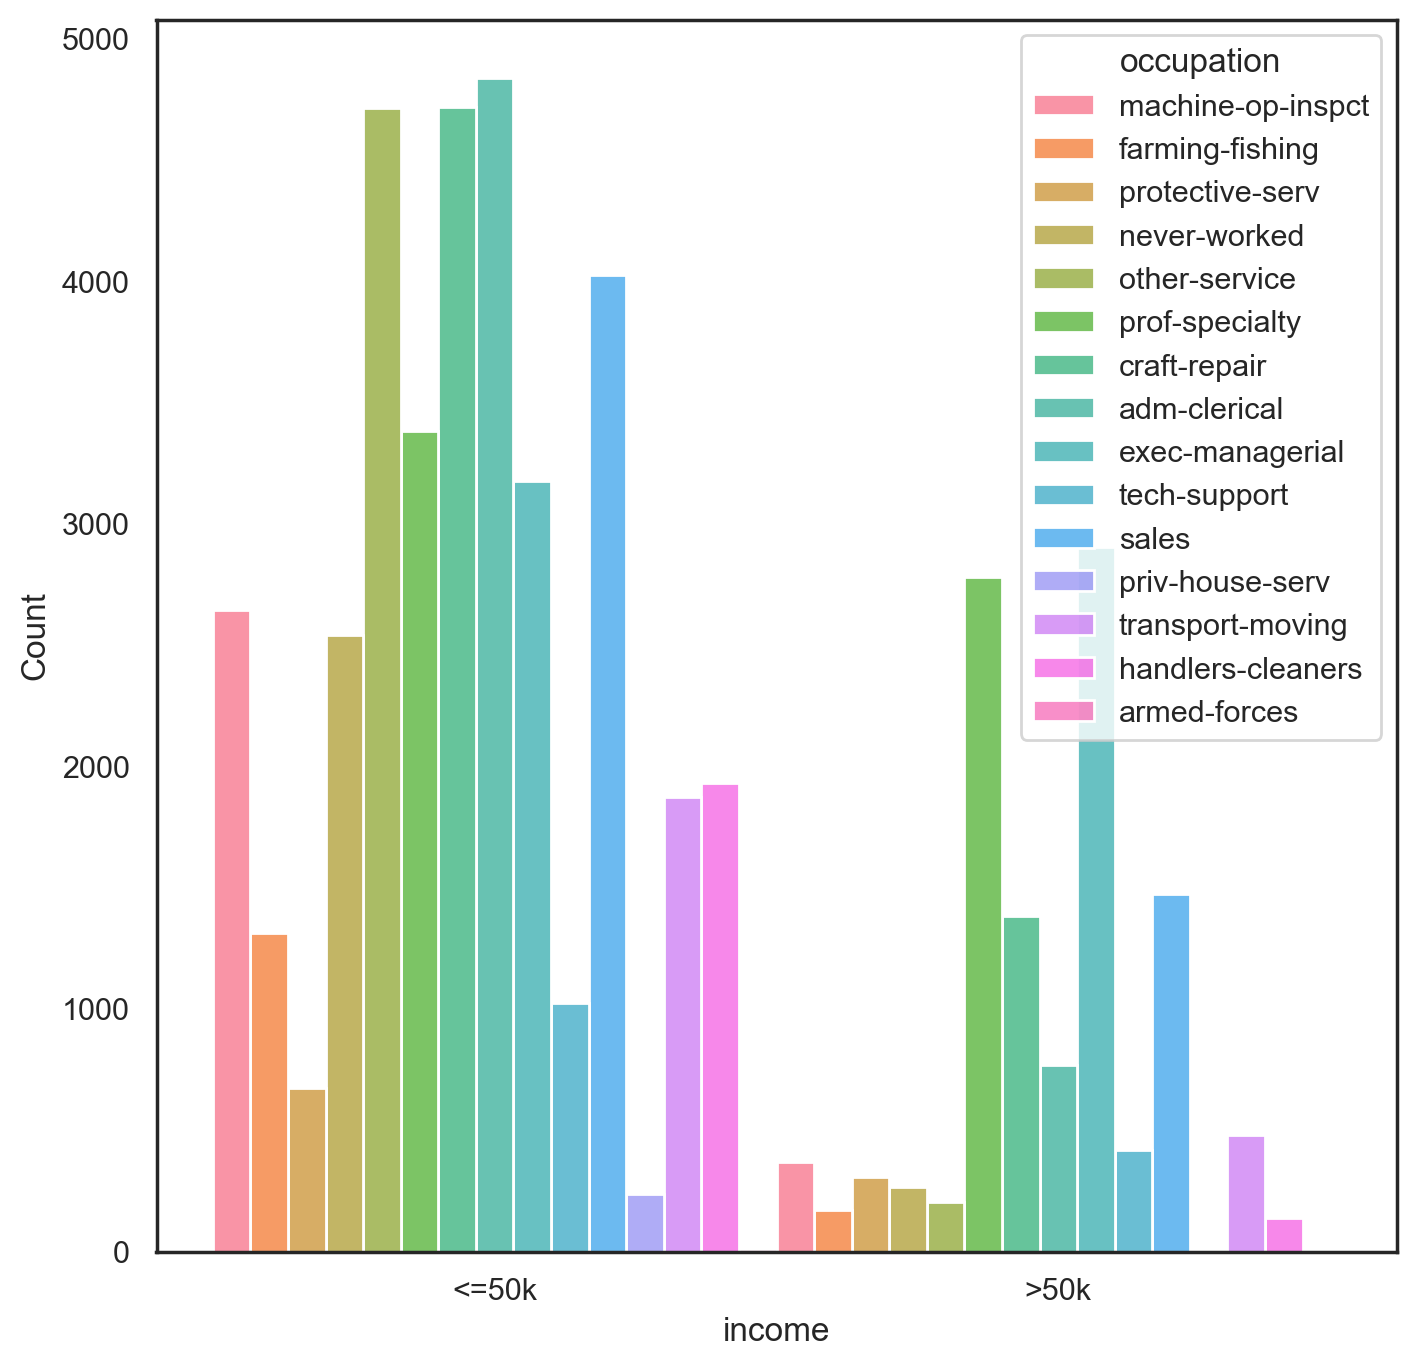

In [262]:
plt.figure(figsize=(8,8))
sns.histplot(binwidth=1,
            x='income',
            hue='occupation',
            data=df_3,
            stat="count",
            multiple="dodge")

## race & income

<AxesSubplot: xlabel='income', ylabel='Count'>

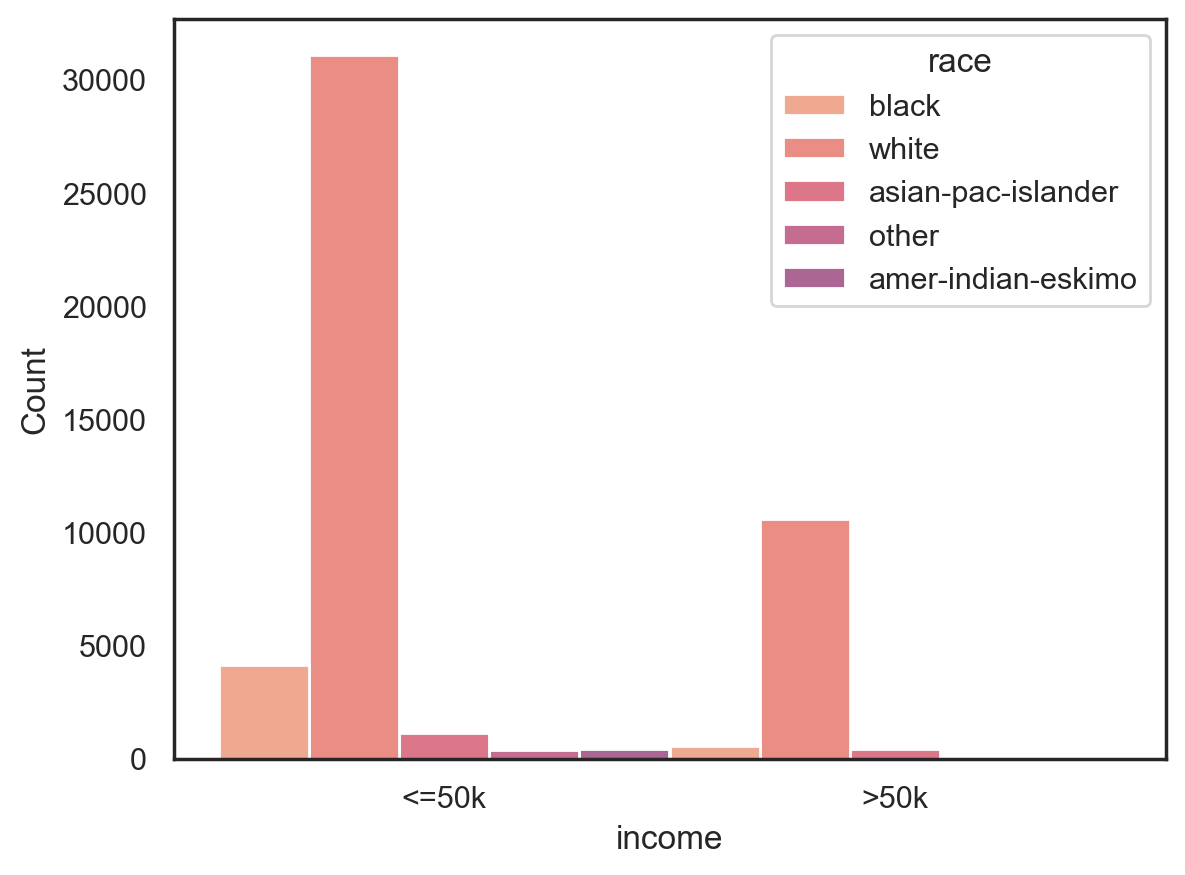

In [263]:
sns.histplot(binwidth=1,
            x='income',
            hue='race',
            data=df_3,
            stat="count",
            multiple="dodge")

## gender & income

<AxesSubplot: xlabel='income', ylabel='Count'>

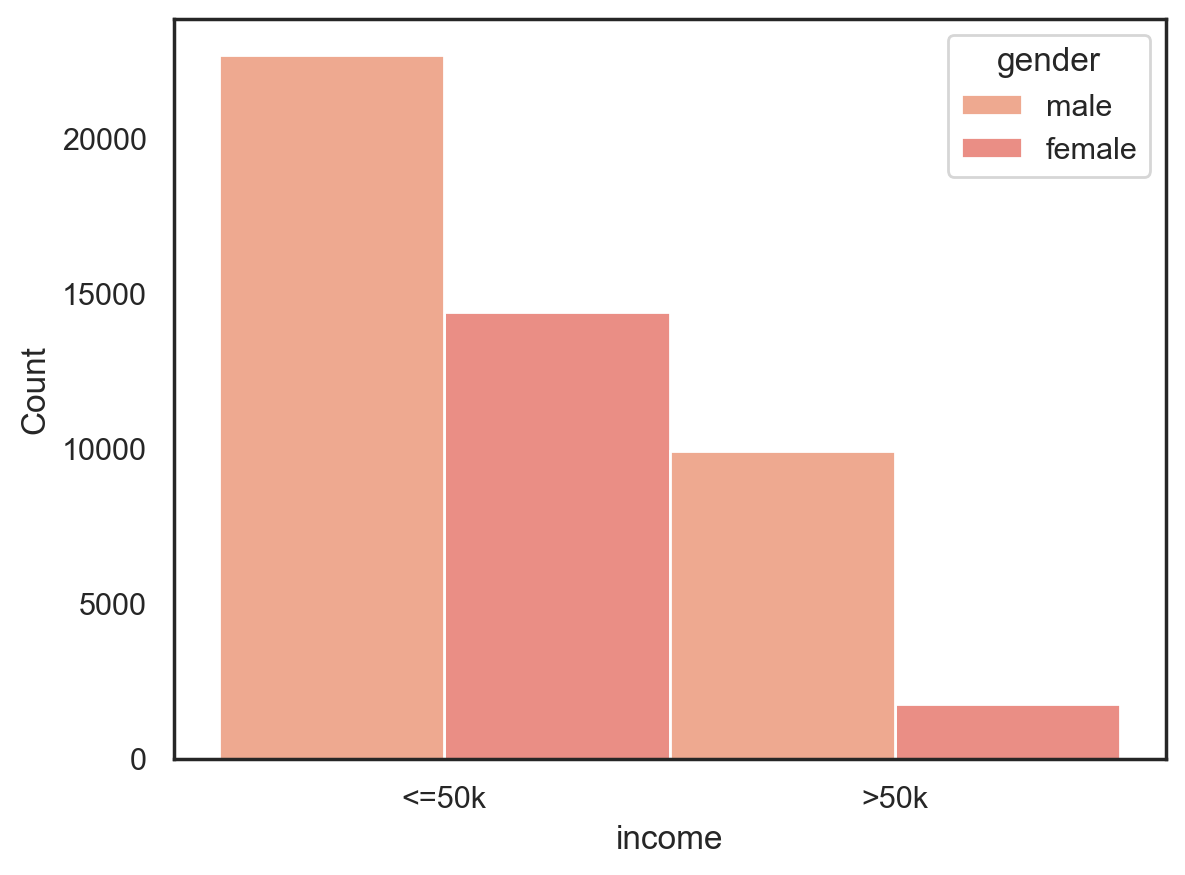

In [264]:
sns.histplot(binwidth=1,
            x='income',
            hue='gender',
            data=df_3,
            stat="count",
            multiple="dodge")

## native country & income

<AxesSubplot: xlabel='income', ylabel='Count'>

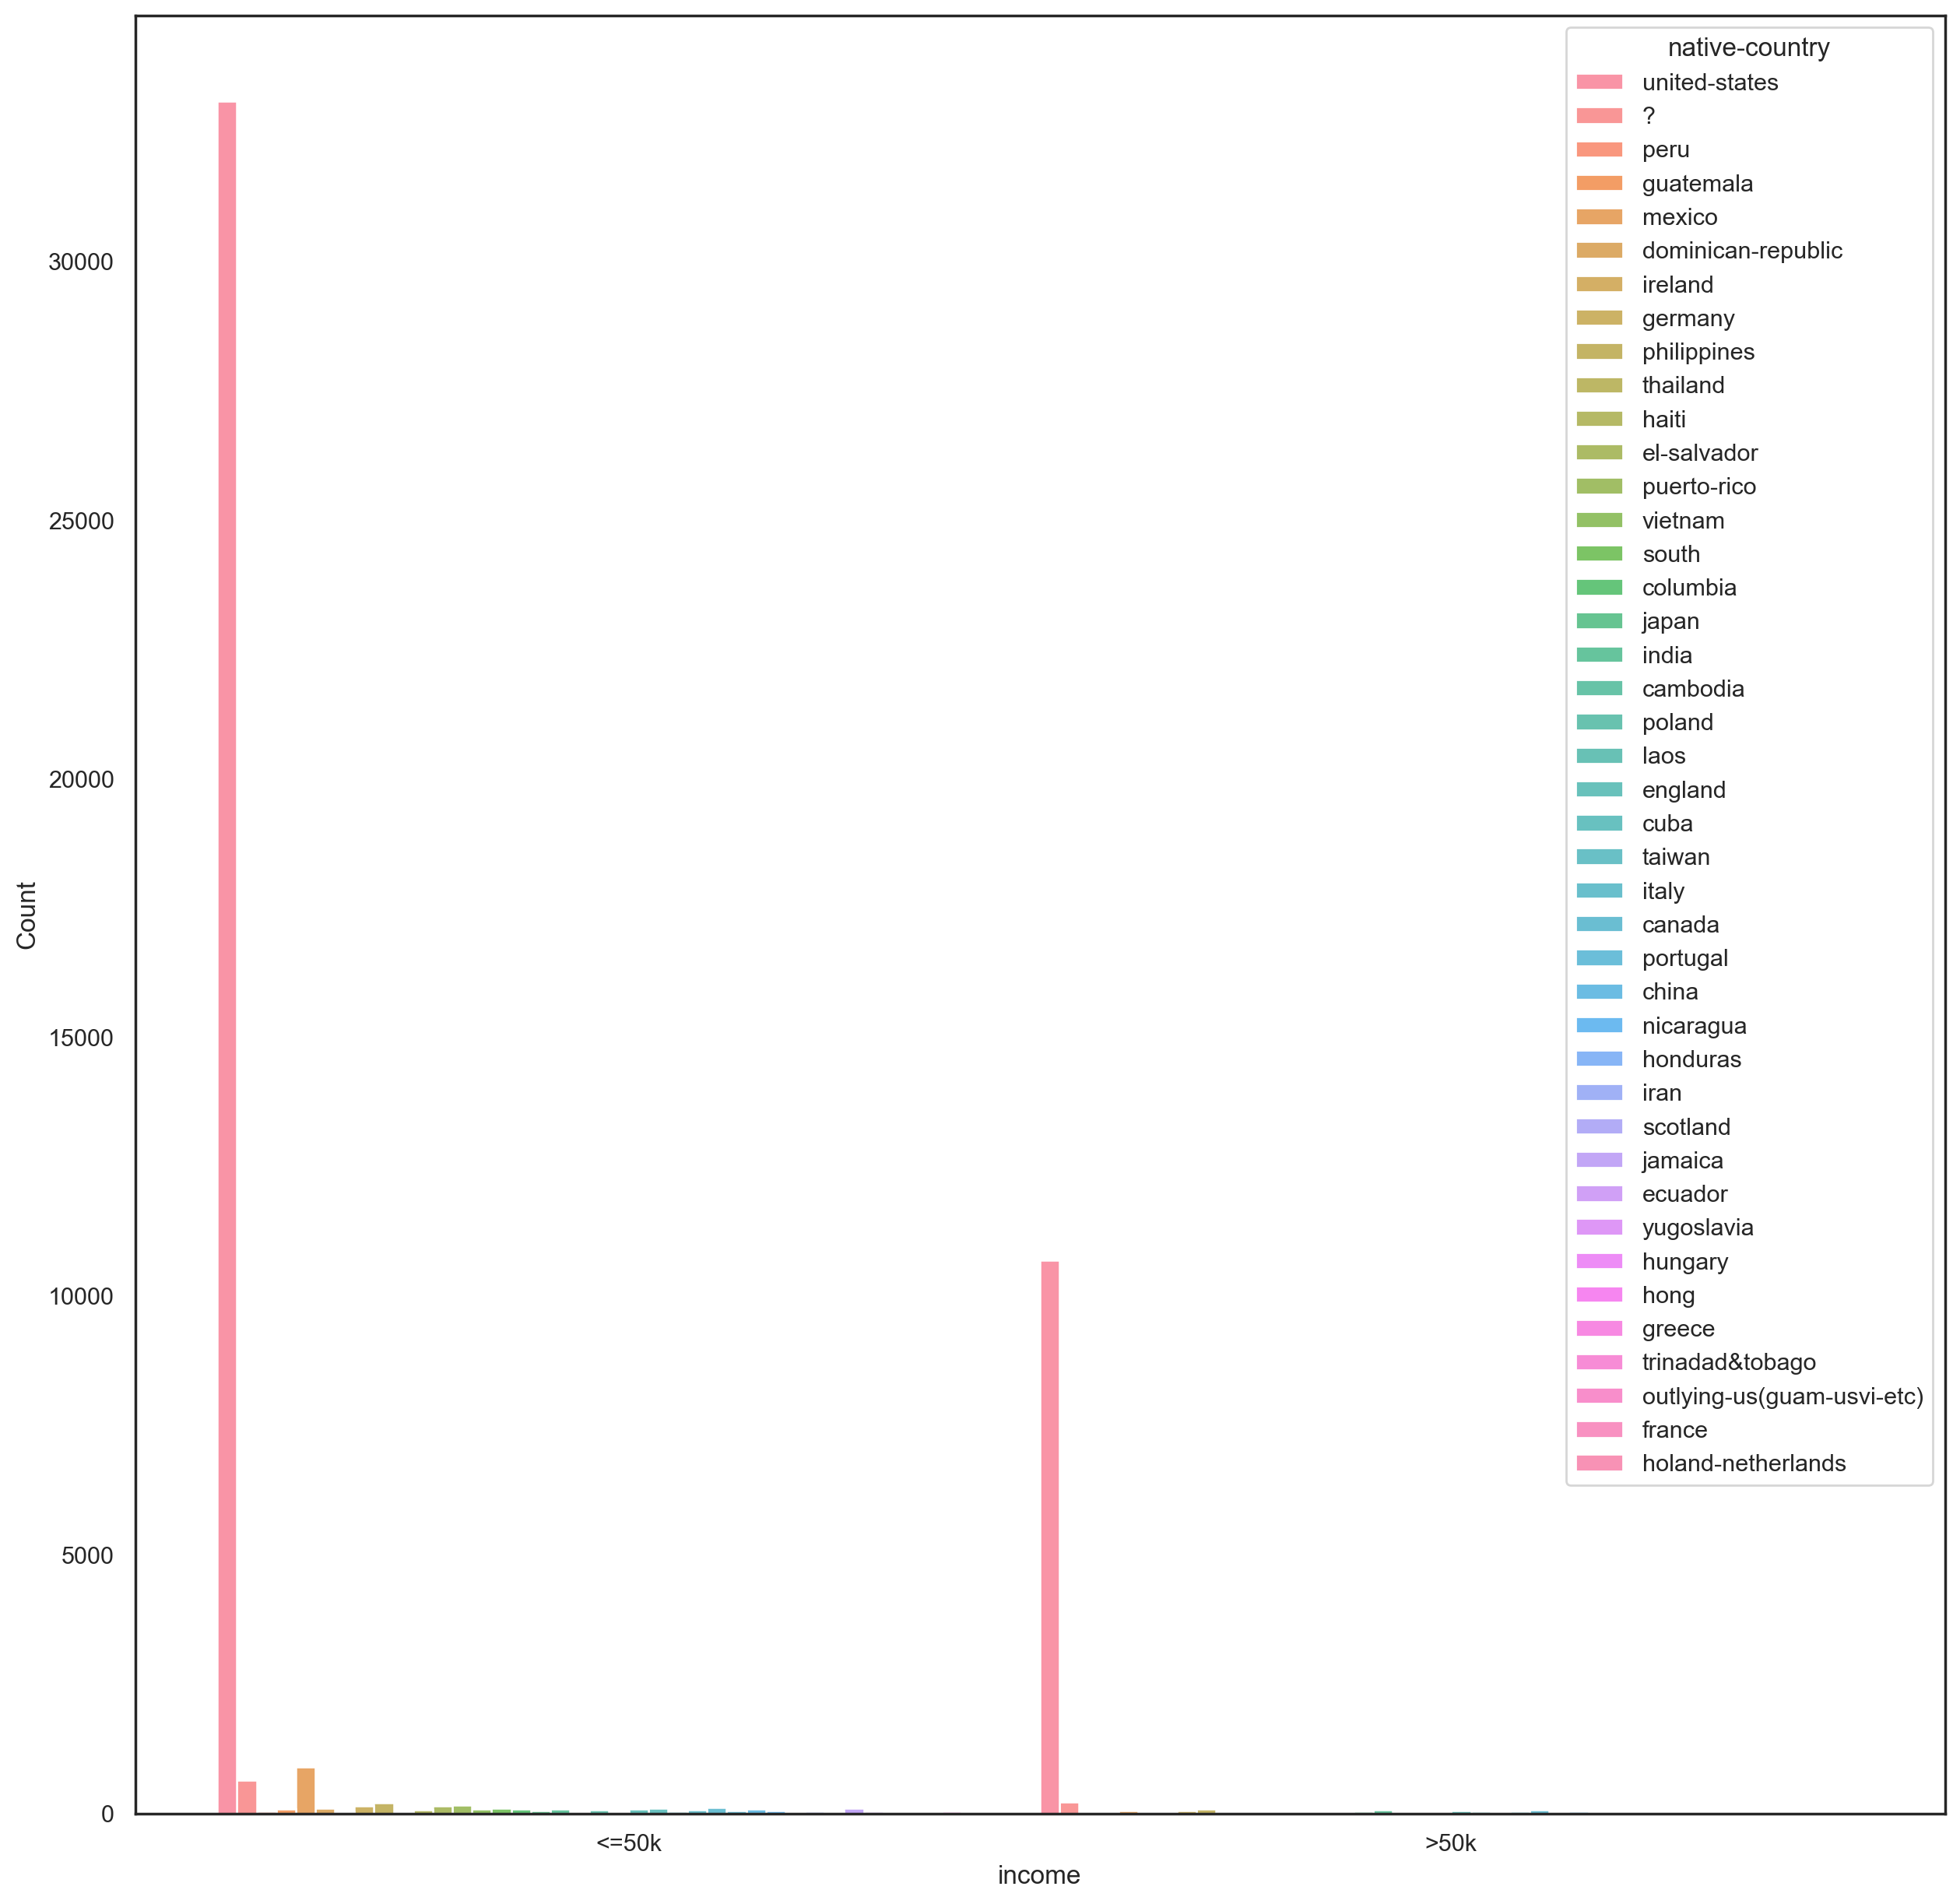

In [267]:
plt.figure(figsize=(15,15))
sns.histplot(binwidth=1,
            x='income',
            hue='native-country',
            data=df_3,
            stat="count",
            multiple="dodge")